# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

**The company wants to know:**

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The Problem solving would include be steps
    1. Reading and Clean up of Dataset
    2. Analysis with EDA
    3. Preprocessing operations
    4. Splitting the Dataset
    5. Model Training
    6. Applying Regularization with Ridge and Lasso
    7. Hyperparameter Tuning
    8. Model Evaluation with Test Data

In [869]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [870]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1 - Reading and Cleanup Operations

In [871]:
house_df = pd.read_csv('train.csv')
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [872]:
house_df.shape

(1460, 81)

In [873]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [874]:
# Drop the Id columns which is symbolic.
house_df = house_df.drop(['Id'], axis=1)

We can clearly see there are columns with multiple missing values. We have total number of 1460 records and many columns have missing records. 

### Let's handle the missing values in multiple columns

In [875]:
def get_missing_val_cols(house_df):
    missing_val_col = {}
    for col in house_df.columns:
        if house_df[col].isnull().sum() > 0:
            missing_val_col[col] = house_df[col].isnull().sum()
    return missing_val_col

**Let's drop those columns where number of missing values are more than 10% of the total records i.e 146**

In [876]:
col_high_missing_vals = dict(filter(lambda x: x[1] > int(house_df.shape[0]/10), get_missing_val_cols(house_df).items()))
print(col_high_missing_vals)

{'LotFrontage': 259, 'Alley': 1369, 'FireplaceQu': 690, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


In [877]:
house_df.drop(col_high_missing_vals.keys(), axis=1, inplace=True)
house_df.shape

(1460, 74)

In [878]:
missing_val_col = get_missing_val_cols(house_df)
print(missing_val_col)

{'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81}


In [879]:
house_df[house_df['GarageYrBlt'].isnull()][['GarageFinish', 'GarageType', 'GarageQual', 'GarageCond']]

GarageFinish GarageType GarageQual GarageCond
39            NaN        NaN        NaN        NaN
48            NaN        NaN        NaN        NaN
78            NaN        NaN        NaN        NaN
88            NaN        NaN        NaN        NaN
89            NaN        NaN        NaN        NaN
99            NaN        NaN        NaN        NaN
108           NaN        NaN        NaN        NaN
125           NaN        NaN        NaN        NaN
127           NaN        NaN        NaN        NaN
140           NaN        NaN        NaN        NaN
148           NaN        NaN        NaN        NaN
155           NaN        NaN        NaN        NaN
163           NaN        NaN        NaN        NaN
165           NaN        NaN        NaN        NaN
198           NaN        NaN        NaN        NaN
210           NaN        NaN        NaN        NaN
241           NaN        NaN        NaN        NaN
250           NaN        NaN        NaN        NaN
287           NaN        NaN        NaN        NaN
291           NaN        NaN        NaN        NaN
307           NaN        NaN        NaN        NaN
375           NaN        NaN        NaN        NaN
386           NaN        NaN        NaN        NaN
393           NaN        NaN        NaN        NaN
431           NaN        NaN        NaN        NaN
434           NaN        NaN        NaN        NaN
441           NaN        NaN        NaN        NaN
464           NaN        NaN        NaN        NaN
495           NaN        NaN        NaN        NaN
520           NaN        NaN        NaN        NaN
528           NaN        NaN        NaN        NaN
533           NaN        NaN        NaN        NaN
535           NaN        NaN        NaN        NaN
562           NaN        NaN        NaN        NaN
582           NaN        NaN        NaN        NaN
613           NaN        NaN        NaN        NaN
614           NaN        NaN        NaN        NaN
620           NaN        NaN        NaN        NaN
635           NaN        NaN        NaN        NaN
636           NaN        NaN        NaN        NaN
638           NaN        NaN        NaN        NaN
649           NaN        NaN        NaN        NaN
705           NaN        NaN        NaN        NaN
710           NaN        NaN        NaN        NaN
738           NaN        NaN        NaN        NaN
750           NaN        NaN        NaN        NaN
784           NaN        NaN        NaN        NaN
826           NaN        NaN        NaN        NaN
843           NaN        NaN        NaN        NaN
921           NaN        NaN        NaN        NaN
942           NaN        NaN        NaN        NaN
954           NaN        NaN        NaN        NaN
960           NaN        NaN        NaN        NaN
968           NaN        NaN        NaN        NaN
970           NaN        NaN        NaN        NaN
976           NaN        NaN        NaN        NaN
1009          NaN        NaN        NaN        NaN
1011          NaN        NaN        NaN        NaN
1030          NaN        NaN        NaN        NaN
1038          NaN        NaN        NaN        NaN
1096          NaN        NaN        NaN        NaN
1123          NaN        NaN        NaN        NaN
1131          NaN        NaN        NaN        NaN
1137          NaN        NaN        NaN        NaN
1143          NaN        NaN        NaN        NaN
1173          NaN        NaN        NaN        NaN
1179          NaN        NaN        NaN        NaN
1218          NaN        NaN        NaN        NaN
1219          NaN        NaN        NaN        NaN
1234          NaN        NaN        NaN        NaN
1257          NaN        NaN        NaN        NaN
1283          NaN        NaN        NaN        NaN
1323          NaN        NaN        NaN        NaN
1325          NaN        NaN        NaN        NaN
1326          NaN        NaN        NaN        NaN
1337          NaN        NaN        NaN        NaN
1349          NaN        NaN        NaN        NaN
1407          NaN        Na

Since the Garage built year is a date-year field. It will be diffult to assume business use case to impute this column. Also, the rows where the garage built year is missing rest of the Garage attributes are also missing. 

So, it would be better to drop the rows where garage built year is missing.

Let's go ahead and drop the rows with missing GarageYrBlt.

In [880]:
house_df = house_df[house_df['GarageYrBlt'].isnull() == False]
house_df.shape

(1379, 74)

In [881]:
missing_val_col = get_missing_val_cols(house_df)
print(missing_val_col)

{'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 30, 'BsmtCond': 30, 'BsmtExposure': 31, 'BsmtFinType1': 30, 'BsmtFinType2': 31, 'Electrical': 1}


In [882]:
house_df['MasVnrArea'].describe()

count    1371.000000
mean      108.997082
std       184.545459
min         0.000000
25%         0.000000
50%         0.000000
75%       171.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

There is high possibility that MasVnrArea has some outliers. As we can see there is high difference between 75 percentile and max value. We will visualize it better with Box plots during EDA phase. For now we will impute it with Median. 

Mean can be influenced by the outliers here. So, not using Mean for imputation.

In [883]:
house_df['MasVnrArea'].fillna(value=house_df['MasVnrArea'].median(), inplace=True)

In [884]:
missing_val_col = get_missing_val_cols(house_df)
print(missing_val_col)

{'MasVnrType': 8, 'BsmtQual': 30, 'BsmtCond': 30, 'BsmtExposure': 31, 'BsmtFinType1': 30, 'BsmtFinType2': 31, 'Electrical': 1}


In [885]:
for key in missing_val_col.keys():
    house_df[key].fillna(value=house_df[key].mode()[0], inplace=True)

In [886]:
house_df['MasVnrType'].value_counts()

None       797
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [887]:
house_df['BsmtQual'].value_counts()

Gd    631
TA    595
Ex    121
Fa     32
Name: BsmtQual, dtype: int64

In [888]:
house_df['BsmtCond'].value_counts()

TA    1277
Gd      63
Fa      38
Po       1
Name: BsmtCond, dtype: int64

In [889]:
house_df['BsmtExposure'].value_counts()

No    927
Av    213
Gd    128
Mn    111
Name: BsmtExposure, dtype: int64

In [890]:
house_df['BsmtFinType1'].value_counts()

GLQ    438
Unf    396
ALQ    209
BLQ    141
Rec    126
LwQ     69
Name: BsmtFinType1, dtype: int64

In [891]:
house_df['BsmtFinType2'].value_counts()

Unf    1217
Rec      53
LwQ      46
BLQ      32
ALQ      19
GLQ      12
Name: BsmtFinType2, dtype: int64

In [892]:
house_df['Electrical'].value_counts()

SBrkr    1273
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [893]:
missing_val_col = get_missing_val_cols(house_df)
print(missing_val_col)

{}


Now we can see there are no missing value in our datset. Now we are good to move to EDA phase.

## EDA phase - Univariate, Bivariate analysis

In [894]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   int64  
 1   MSZoning       1379 non-null   object 
 2   LotArea        1379 non-null   int64  
 3   Street         1379 non-null   object 
 4   LotShape       1379 non-null   object 
 5   LandContour    1379 non-null   object 
 6   Utilities      1379 non-null   object 
 7   LotConfig      1379 non-null   object 
 8   LandSlope      1379 non-null   object 
 9   Neighborhood   1379 non-null   object 
 10  Condition1     1379 non-null   object 
 11  Condition2     1379 non-null   object 
 12  BldgType       1379 non-null   object 
 13  HouseStyle     1379 non-null   object 
 14  OverallQual    1379 non-null   int64  
 15  OverallCond    1379 non-null   int64  
 16  YearBuilt      1379 non-null   int64  
 17  YearRemodAdd   1379 non-null   int64  
 18  RoofStyl

In [895]:
house_df.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold     SalePrice
count  1379.000000    1379.000000  1379.000000  1379.000000  1379.000000   1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000   1379.000000  1379.000000   1379.000000   1379.000000  1379.000000  1379.000000   1379.000000   1379.000000   1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000    1379.000000  1379.000000  1379.000000  1379.000000   1379.000000  1379.000000  1379.000000    1379.00000
mean     56.022480   10695.812183     6.187092     5.577955  1972.958666   1985.435098   108.364757   455.578680    48.102248   570.765047  1074.445975  1177.129804   353.424946      4.134880  1534.689630      0.430747      0.058738     1.580131     0.395939      2.865120      1.038434      6.552574     0.641769  1978.506164     1.870921   500.762146    97.456853    47.276287      21.039159     3.609862    15.945613     2.920957     42.889050     6.334300  2007.812183  185479.51124
std      41.026897   10214.702133     1.345780     1.081031    29.379883     20.444852   184.195220   459.691379   164.324665   443.677845   436.371874   387.014961   439.553171     40.130546   519.140514      0.514052      0.238285     0.548051     0.502402      0.783961      0.196048      1.589821     0.645985    24.689725     0.630055   185.680520   126.699192    65.210465      60.535107    30.154682    57.249593    41.335545    501.613931     2.696674     1.330221   79023.89060
min      20.000000    1300.000000     2.000000     2.000000  1880.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000      3.000000     0.000000  1900.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   35311.00000
25%      20.000000    7741.000000     5.000000     5.000000  1955.000000   1968.000000     0.000000     0.000000     0.000000   228.000000   810.000000   894.000000     0.000000      0.000000  1154.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   380.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  134000.00000
50%      50.000000    9591.000000     6.000000     5.000000  1976.000000   1994.000000     0.000000   400.000000     0.000000   476.000000  1008.000000  1098.000000     0.000000      0.000000  1479.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   484.000000     0.000000    27.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  167500.00000
75%      70.000000   11708.500000     7.000000     6.000000  2001.000000   2004.000000   170.500000   732.000000     0.000000   811.000000  1314.000000  1414.000000   738.500000      0.000000  1790.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   580.000000   171.000000    69.500000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  217750.00000
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000

Let's see the distribution of the Target variable SalePrice using histogram.

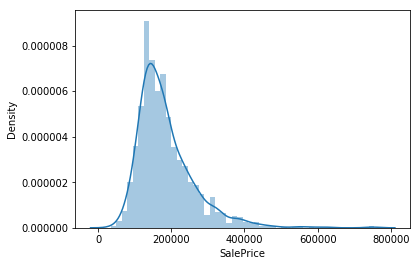

In [896]:
sns.distplot(house_df['SalePrice'])
plt.show()

In [897]:
#GarageYrBlt is year value. So let's convert it's dataype to int
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].astype('int64')

# 'MSSubClass', 'OverallQual', 'OverallCond' are categorical variable as per data dictiona. Let's comvert them object
house_df[['MSSubClass', 'OverallQual', 'OverallCond']] = house_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1379 non-null   object 
 1   MSZoning       1379 non-null   object 
 2   LotArea        1379 non-null   int64  
 3   Street         1379 non-null   object 
 4   LotShape       1379 non-null   object 
 5   LandContour    1379 non-null   object 
 6   Utilities      1379 non-null   object 
 7   LotConfig      1379 non-null   object 
 8   LandSlope      1379 non-null   object 
 9   Neighborhood   1379 non-null   object 
 10  Condition1     1379 non-null   object 
 11  Condition2     1379 non-null   object 
 12  BldgType       1379 non-null   object 
 13  HouseStyle     1379 non-null   object 
 14  OverallQual    1379 non-null   object 
 15  OverallCond    1379 non-null   object 
 16  YearBuilt      1379 non-null   int64  
 17  YearRemodAdd   1379 non-null   int64  
 18  RoofStyl

In [898]:
#Let's get the numric columns
num_col_val = house_df.select_dtypes(include=['int64', 'float64'])
continuous_vars = list(num_col_val.columns)
house_df[continuous_vars].describe()

LotArea    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold     SalePrice
count    1379.000000  1379.000000   1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000   1379.000000  1379.000000   1379.000000   1379.000000  1379.000000  1379.000000   1379.000000   1379.000000   1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000  1379.000000    1379.000000  1379.000000  1379.000000  1379.000000   1379.000000  1379.000000  1379.000000    1379.00000
mean    10695.812183  1972.958666   1985.435098   108.364757   455.578680    48.102248   570.765047  1074.445975  1177.129804   353.424946      4.134880  1534.689630      0.430747      0.058738     1.580131     0.395939      2.865120      1.038434      6.552574     0.641769  1978.506164     1.870921   500.762146    97.456853    47.276287      21.039159     3.609862    15.945613     2.920957     42.889050     6.334300  2007.812183  185479.51124
std     10214.702133    29.379883     20.444852   184.195220   459.691379   164.324665   443.677845   436.371874   387.014961   439.553171     40.130546   519.140514      0.514052      0.238285     0.548051     0.502402      0.783961      0.196048      1.589821     0.645985    24.689725     0.630055   185.680520   126.699192    65.210465      60.535107    30.154682    57.249593    41.335545    501.613931     2.696674     1.330221   79023.89060
min      1300.000000  1880.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   438.000000     0.000000      0.000000   438.000000      0.000000      0.000000     0.000000     0.000000      0.000000      1.000000      3.000000     0.000000  1900.000000     1.000000   160.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   35311.00000
25%      7741.000000  1955.000000   1968.000000     0.000000     0.000000     0.000000   228.000000   810.000000   894.000000     0.000000      0.000000  1154.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   380.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  134000.00000
50%      9591.000000  1976.000000   1994.000000     0.000000   400.000000     0.000000   476.000000  1008.000000  1098.000000     0.000000      0.000000  1479.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   484.000000     0.000000    27.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  167500.00000
75%     11708.500000  2001.000000   2004.000000   170.500000   732.000000     0.000000   811.000000  1314.000000  1414.000000   738.500000      0.000000  1790.000000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   580.000000   171.000000    69.500000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  217750.00000
max    215245.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      2.000000      2.000000     3.000000     2.000000      6.000000      3.000000     12.000000     3.000000  2010.000000     4.000000  1418.000000   857.000000   547.000000     552.000000   508.000000   480.000000   738.000000  15500.000000    12.000000  2010.00

We can see there are fields like BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal where data till 75 percentile is 0.0. 

Also, There fields have huge difference between 75 percentile and max values. Let's do further analysis.

In [899]:
house_df['PoolArea'].quantile([.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90    0.0
0.95    0.0
0.96    0.0
0.97    0.0
0.98    0.0
0.99    0.0
Name: PoolArea, dtype: float64

In [900]:
house_df['BsmtFinSF2'].quantile([0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90    125.40
0.95    401.10
0.96    485.28
0.97    551.00
0.98    668.88
0.99    847.16
Name: BsmtFinSF2, dtype: float64

In [901]:
house_df['LowQualFinSF'].quantile([0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90      0.00
0.95      0.00
0.96      0.00
0.97      0.00
0.98      0.00
0.99    125.28
Name: LowQualFinSF, dtype: float64

In [902]:
house_df['EnclosedPorch'].quantile([0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90    108.00
0.95    180.30
0.96    193.76
0.97    216.00
0.98    236.00
0.99    260.10
Name: EnclosedPorch, dtype: float64

In [903]:
house_df['3SsnPorch'].quantile([0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90      0.0
0.95      0.0
0.96      0.0
0.97      0.0
0.98      0.0
0.99    168.0
Name: 3SsnPorch, dtype: float64

In [904]:
house_df['ScreenPorch'].quantile([0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90      0.00
0.95    165.30
0.96    181.76
0.97    192.00
0.98    224.00
0.99    271.44
Name: ScreenPorch, dtype: float64

In [905]:
house_df['MiscVal'].quantile([0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.90      0.0
0.95      0.0
0.96      0.0
0.97    400.0
0.98    500.0
0.99    700.0
Name: MiscVal, dtype: float64

Now Let's drop those columns where the 95 percentile of records are only one unque value(0.0). 

In [906]:
house_df.drop(['MiscVal', '3SsnPorch', 'LowQualFinSF', 'PoolArea'], axis=1, inplace=True)

In [907]:
house_df.shape

(1379, 70)

Let's see the distribution of some of the numeric variables

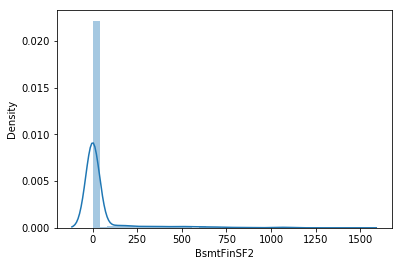

In [908]:
sns.distplot(house_df['BsmtFinSF2'])
plt.show()


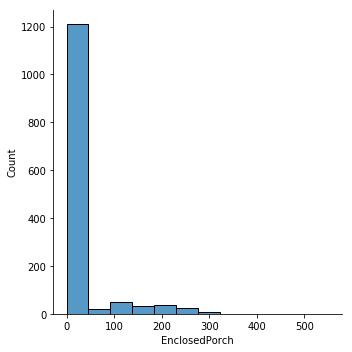

In [909]:
sns.displot(house_df['EnclosedPorch'])
plt.show()

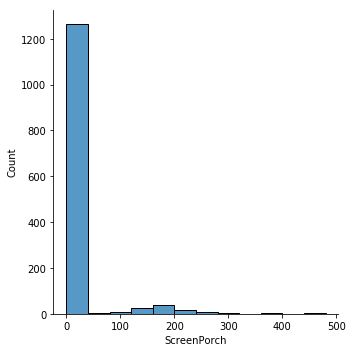

In [910]:
sns.displot(house_df['ScreenPorch'])
plt.show()

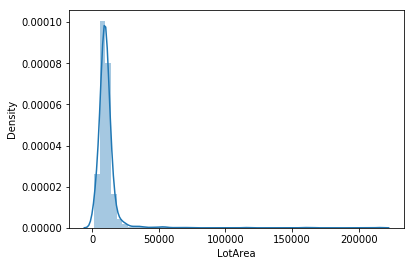

In [911]:
sns.distplot(house_df['LotArea'])
plt.show()

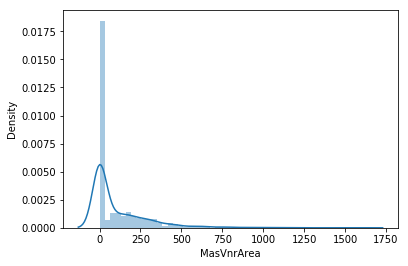

In [912]:
sns.distplot(house_df['MasVnrArea'])
plt.show()

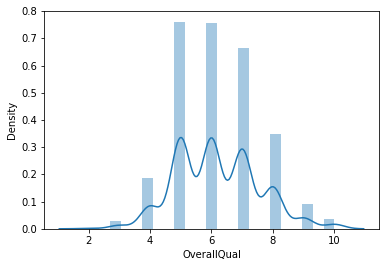

In [913]:
sns.distplot(house_df['OverallQual'])
plt.show()

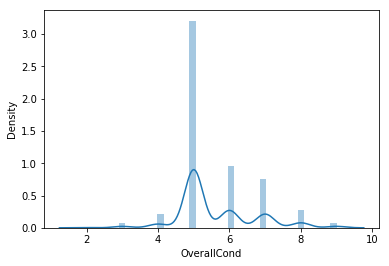

In [914]:
sns.distplot(house_df['OverallCond'])
plt.show()

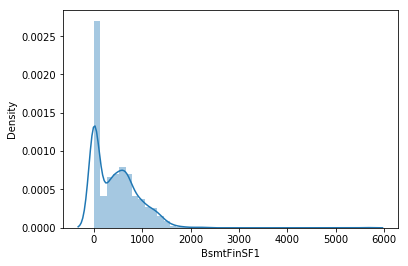

In [915]:
sns.distplot(house_df['BsmtFinSF1'])
plt.show()

##### Let's visulalize numric columns using the box plot and see if there any clearly visible outliers

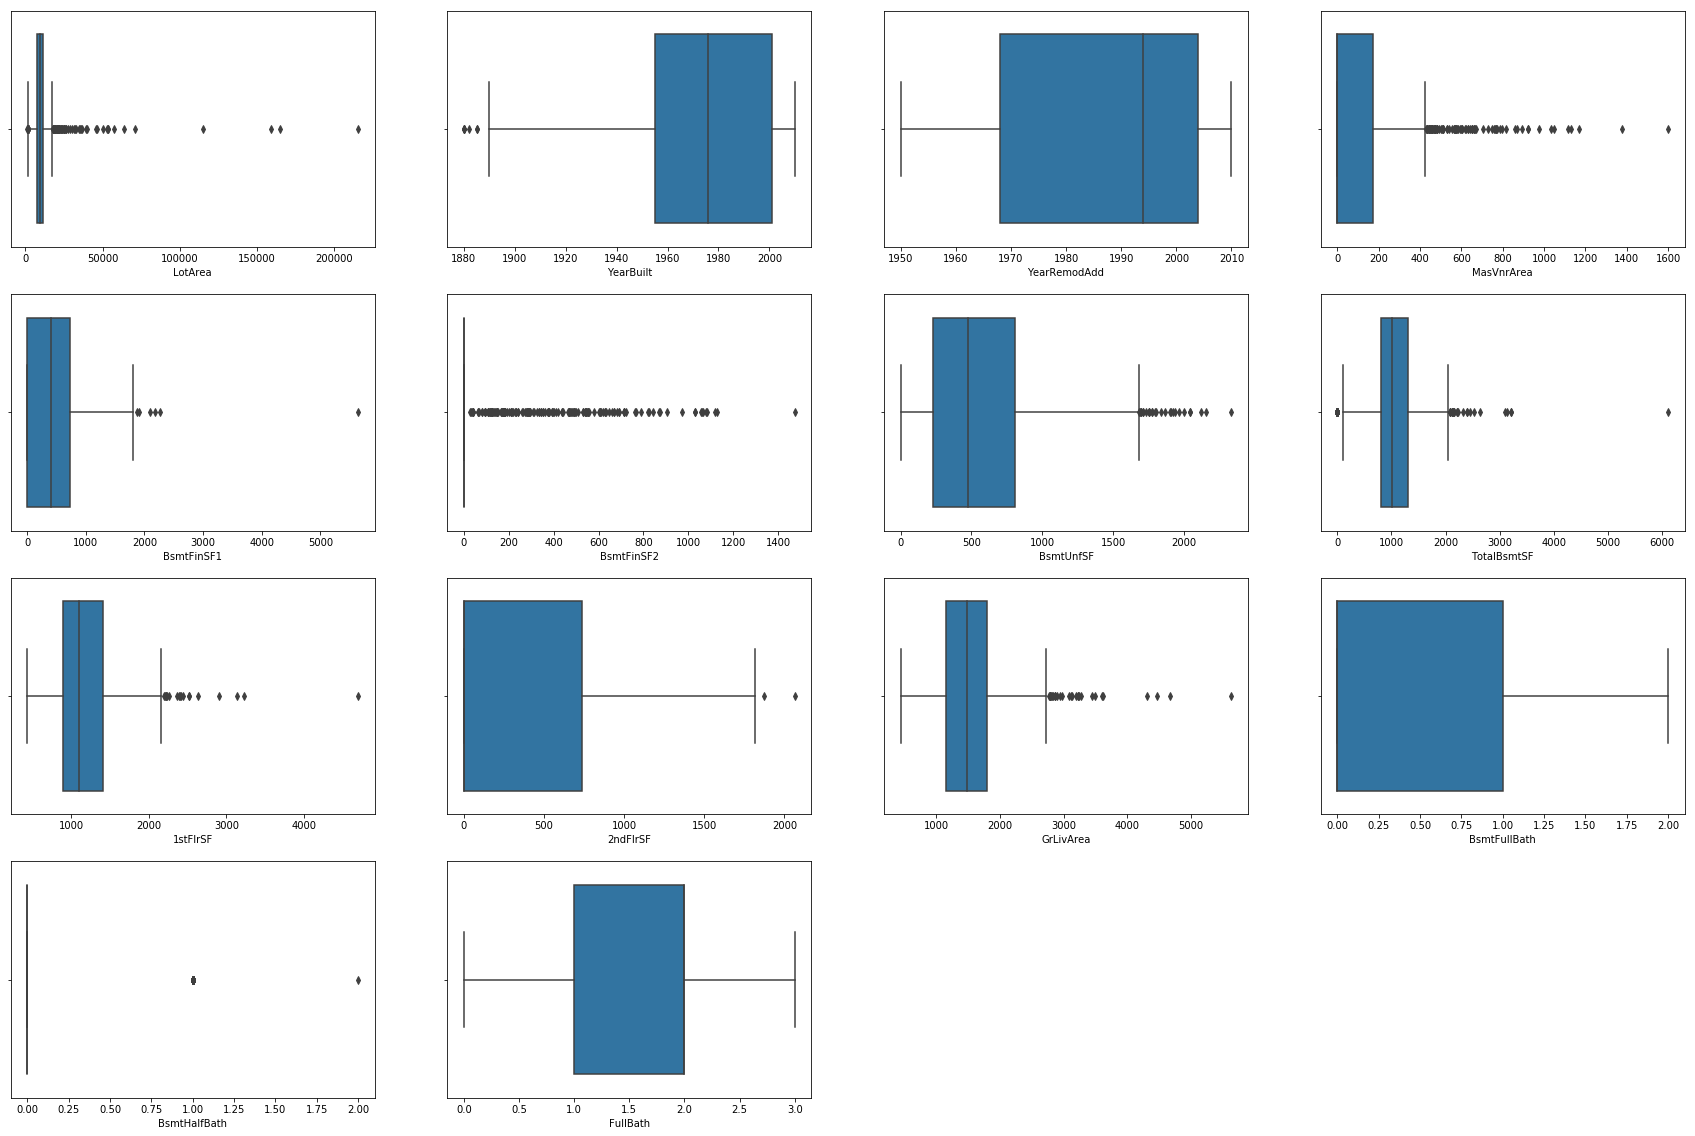

In [916]:
num_col_val = house_df.select_dtypes(include=['int64', 'float64'])
continuous_vars = list(num_col_val.columns)

plt.figure(figsize=(30, 20))
for i in range(int(len(continuous_vars)/2)):
    plt.subplot(4,4,i+1)
    sns.boxplot(house_df[continuous_vars[i]])
plt.show()

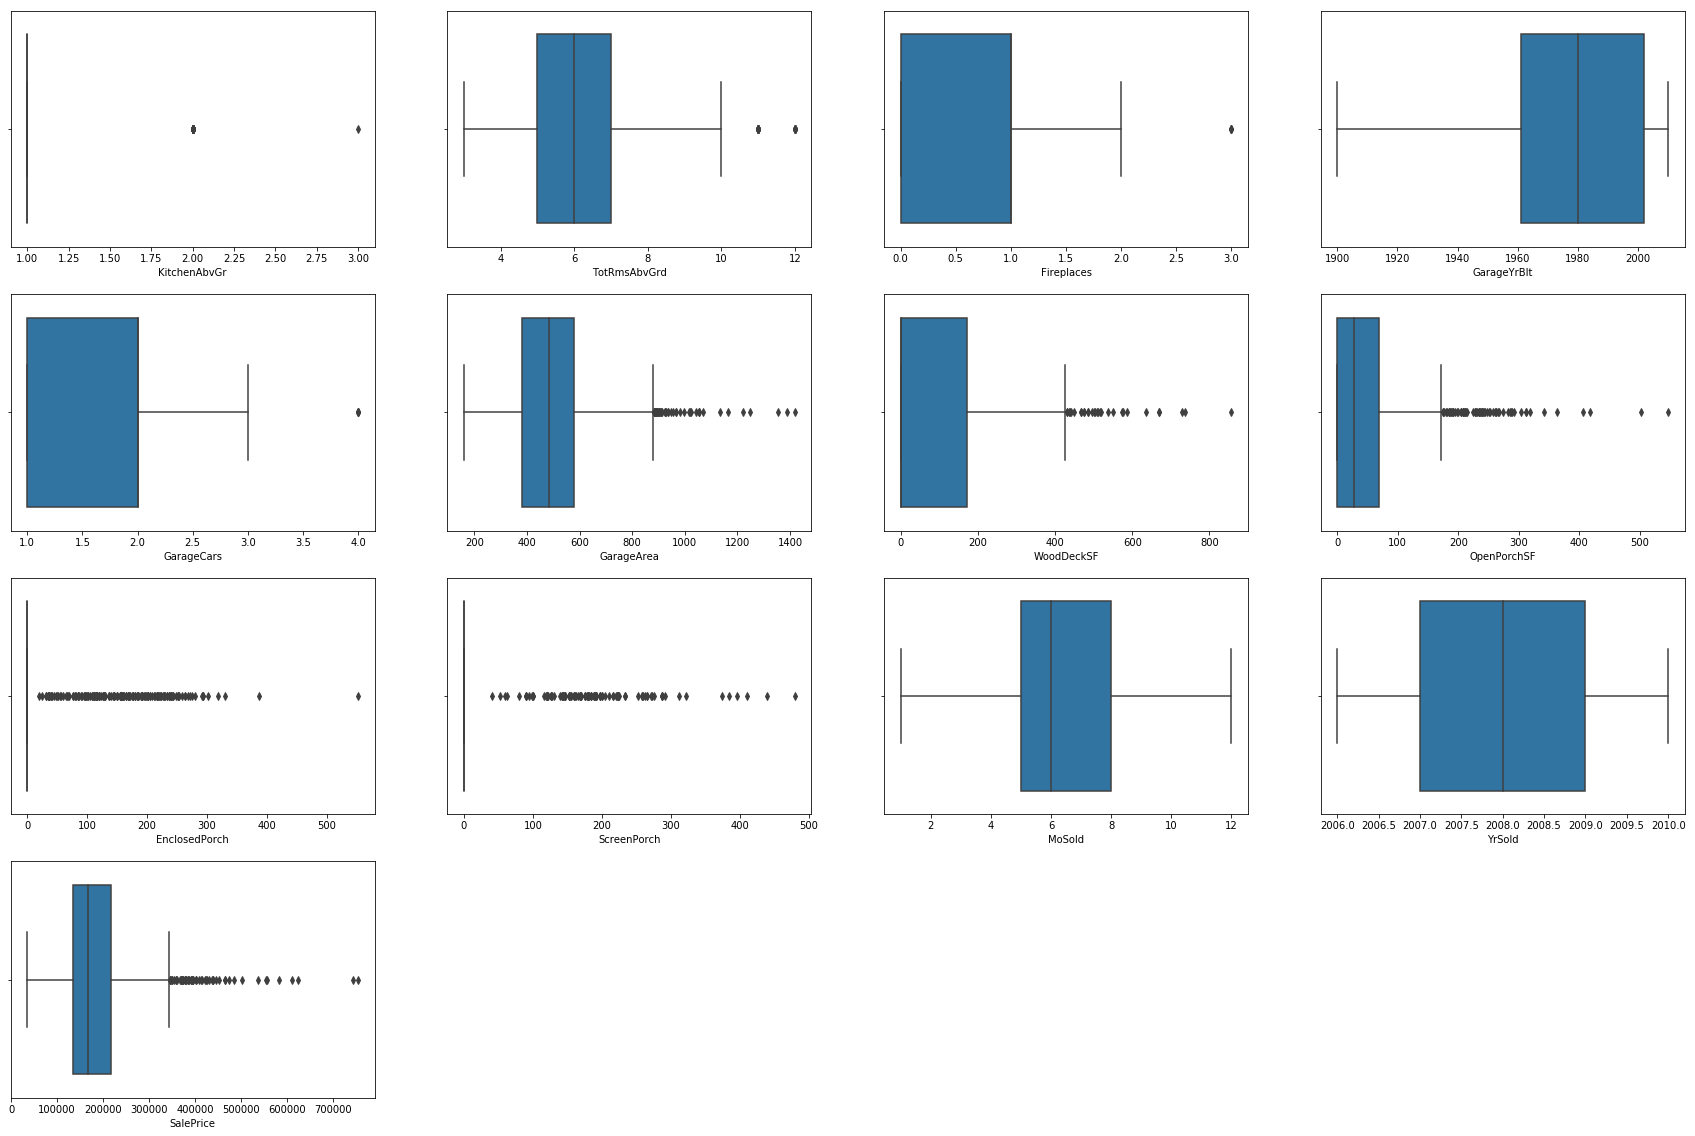

In [917]:
plt.figure(figsize=(30, 20))
for i in range(16, len(continuous_vars)):
    plt.subplot(4,4,i+1-16)
    sns.boxplot(house_df[continuous_vars[i]])
plt.show()

We can see in the above graph that there are some clear ouliers in case of 'EnclosedPorch', 'ScreenPorch' and 'BsmtFinSF2'. Let's see percentile distribution.

In [918]:
house_df['EnclosedPorch'].quantile([0.85,0.88, 0.90, .95, 0.96, 0.97, 0.98, 0.99])

0.85      0.00
0.88     55.28
0.90    108.00
0.95    180.30
0.96    193.76
0.97    216.00
0.98    236.00
0.99    260.10
Name: EnclosedPorch, dtype: float64

In [919]:
house_df['ScreenPorch'].quantile([0.90, 0.91,.95, 0.96, 0.97, 0.98, 0.99])

0.90      0.00
0.91      0.00
0.95    165.30
0.96    181.76
0.97    192.00
0.98    224.00
0.99    271.44
Name: ScreenPorch, dtype: float64

In [920]:
house_df['BsmtFinSF2'].quantile([0.85, 0.90, 0.91, .95, 0.96, 0.97, 0.98, 0.99])

0.85      0.00
0.90    125.40
0.91    172.92
0.95    401.10
0.96    485.28
0.97    551.00
0.98    668.88
0.99    847.16
Name: BsmtFinSF2, dtype: float64

Since More than 85% of records in these columns are 0.0(unique) only. I would be okay to drop these columns from the dataset. For now let's leave these column and let model decide on their importance. 

As we can see there are some number of outliers in columns like 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF'.

Lets remove some pure outlier frirst from the LotArea. We want to discard very houses from our dataset. 

In [921]:
house_df[house_df['LotArea'] > 50000][['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
                          '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
                           'OpenPorchSF' ,
                              'SalePrice']]

LotArea  MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice
53      50271         0.0        1810         1842      1842         0       1842         894         857           72     385000
249    159000       472.0         697         1444      1444       700       2144         389           0           98     277000
313    215245         0.0        1236         2136      2036         0       2036         513           0            0     375000
335    164660         0.0        1249         1499      1619       167       1786         529         670            0     228950
384     53107         0.0         985         1580      1079       874       1953         501         216          231     240000
451     70761         0.0         655         1533      1533         0       1533         576         200           54     280000
457     53227         0.0        1116         1364      1663         0       1663         529         224          137     256000
706    115149       351.0        1219         1643      1824         0       1824         739         380           48     302000
769     53504       603.0        1416         1650      1690      1589       3279         841         503           36     538000
1298    63887       796.0        5644         6110      4692       950       5642        1418         214          292     160000
1396    57200         0.0         353          747      1687         0       1687         572           0            0     160000

As we can see that there are 11 records which has 'LotArea' grater than 5000. This number is less than 1% or total records. 
So, Lets drop these rows and check the box plots again for numeric columns. 

In [922]:
house_df = house_df[house_df['LotArea'] < 50000]
house_df.shape

(1368, 70)

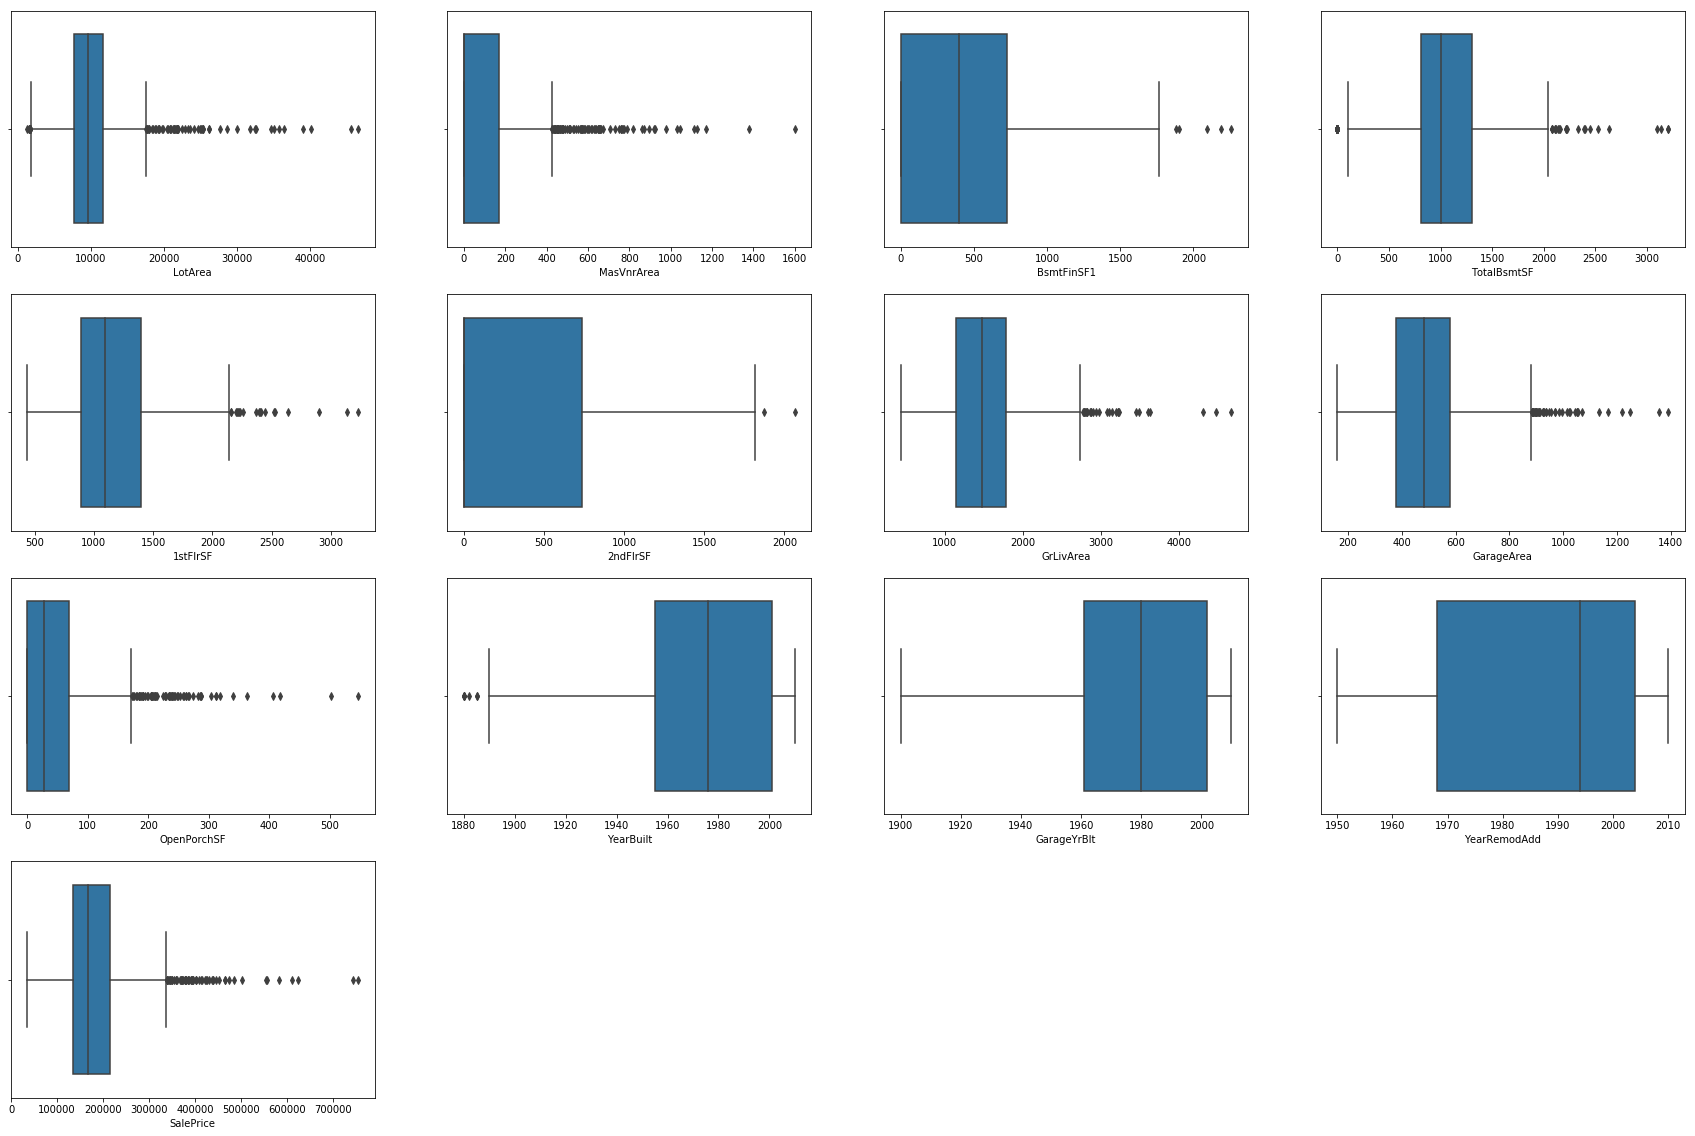

In [923]:
#Let's view the box plot again for few of important numeric columns
imp_continuous_vars = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
                          '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF',
                              'YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'SalePrice',]
plt.figure(figsize=(30, 20))
for i in range(len(imp_continuous_vars)):
    plt.subplot(4,4,i+1)
    sns.boxplot(house_df[imp_continuous_vars[i]])
plt.show()

Now the box plots look better. We can move on to Bovariate Analysis. 

## Bivariate analysis

Let's analyze the relationship between independent continuous variables and target variable SalePrice 

#### Let's analyse year and month columns with Target field SalePrice 

<Figure size 432x288 with 0 Axes>

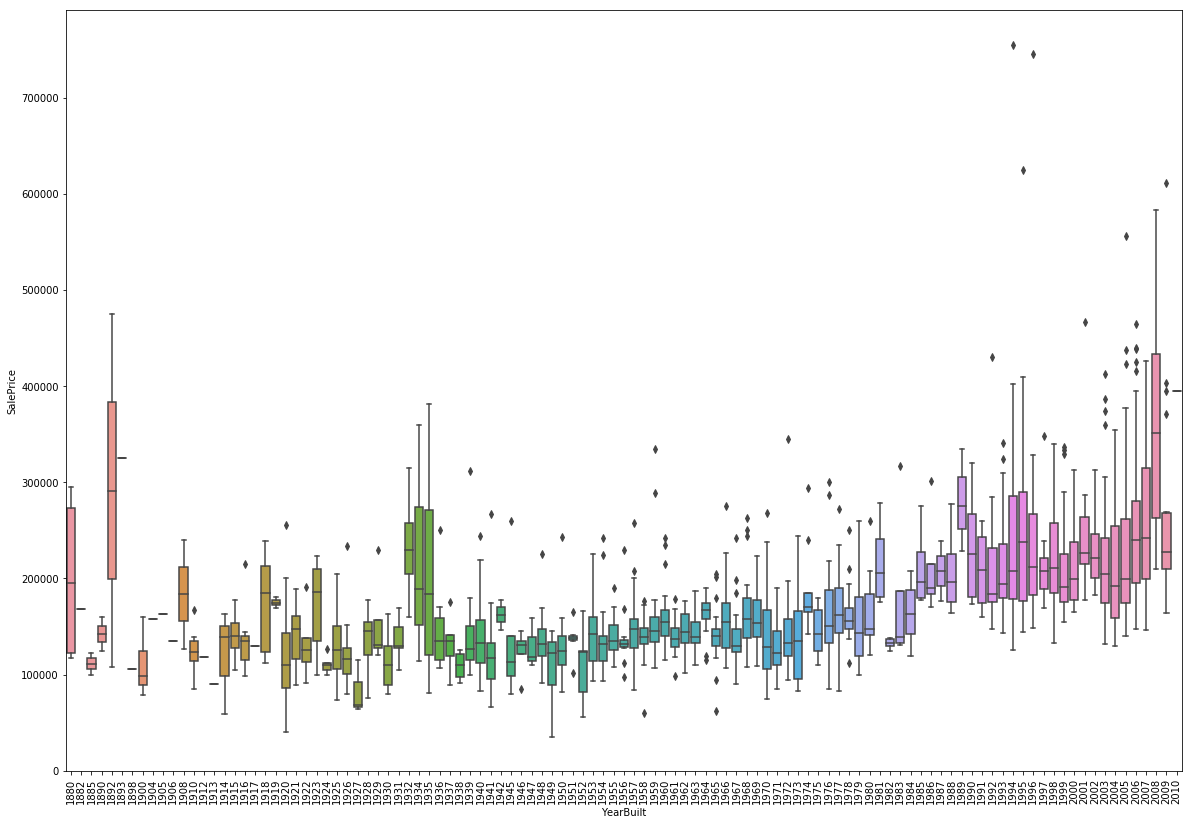

<Figure size 432x288 with 0 Axes>

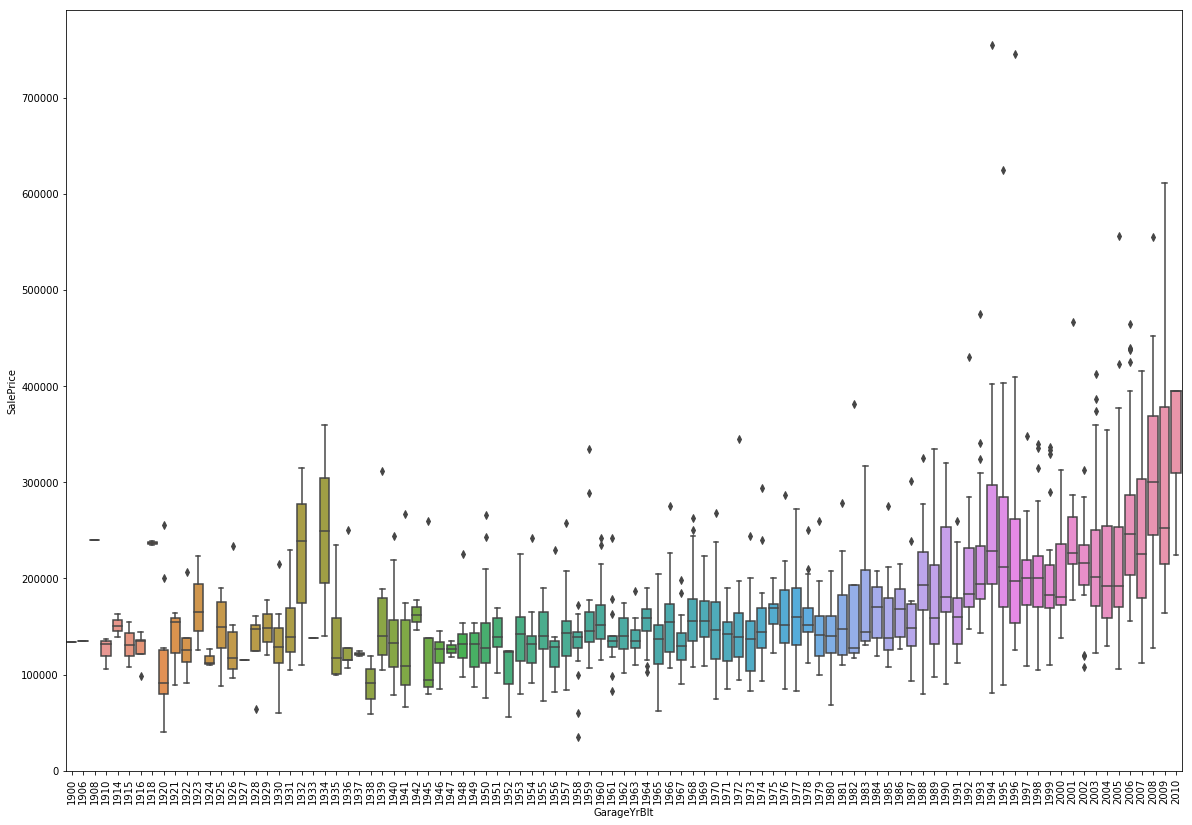

<Figure size 432x288 with 0 Axes>

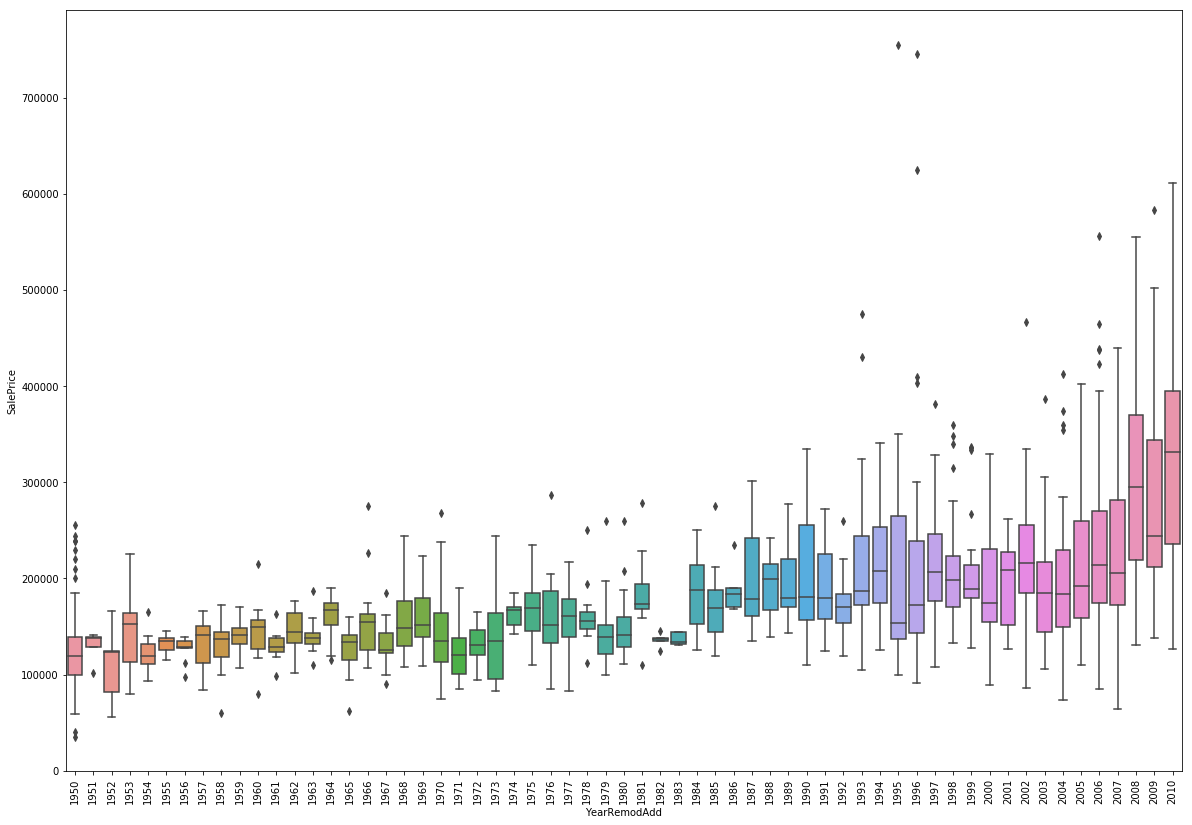

In [924]:
year_cols = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']
for i in range(len(year_cols)):
    plt.figure(i+1)
    plt.figure(figsize=(20, 14))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    sns.boxplot(x = year_cols[i], y = 'SalePrice', data = house_df)
    plt.show()

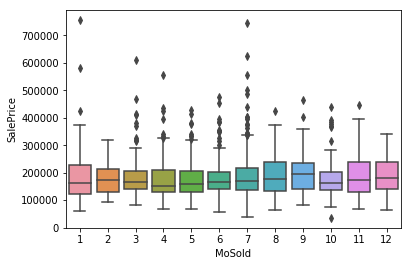

In [925]:
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = house_df)
plt.show()

#### Tranform the year column values to current_value - min_value 

In [926]:
for col in year_cols:
    house_df[col] = house_df[col].apply(lambda x: x-house_df[col].min())
house_df.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold SaleType SaleCondition  SalePrice
0         60       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5        123            53     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854       1710             1             0         2         1             3             1          Gd             8        Typ           0     Attchd          103          RFn           2         548         TA         TA          Y           0           61              0            0       2    2008       WD        Normal     208500
1         20       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8         96            26     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0       1262             0             1         2         0             3             1          TA             6        Typ           1     Attchd           76          RFn           2         460         TA         TA          Y         298            0              0            0       5    2007       WD        Normal     181500
2         60       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5        121            52     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866       1786             1             0         2         1             3             1          Gd             6        Typ           1     Attchd          101          RFn           2         608         TA         TA          Y           0           42              0            0       9    2008       WD        Normal     223500
3         70       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5         35            20     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756       1717             1             0         1         0             3             1          Gd             7        Typ           1     Detchd           98          Unf           3         642         TA         TA          Y           0           35            272            0       2    2006       WD       Abnorml     140000
4         60       RL    14260   Pave      IR1         Lvl    

### Let's view the pair plot between some of the important numeric varaibels.

<Figure size 2880x1440 with 0 Axes>

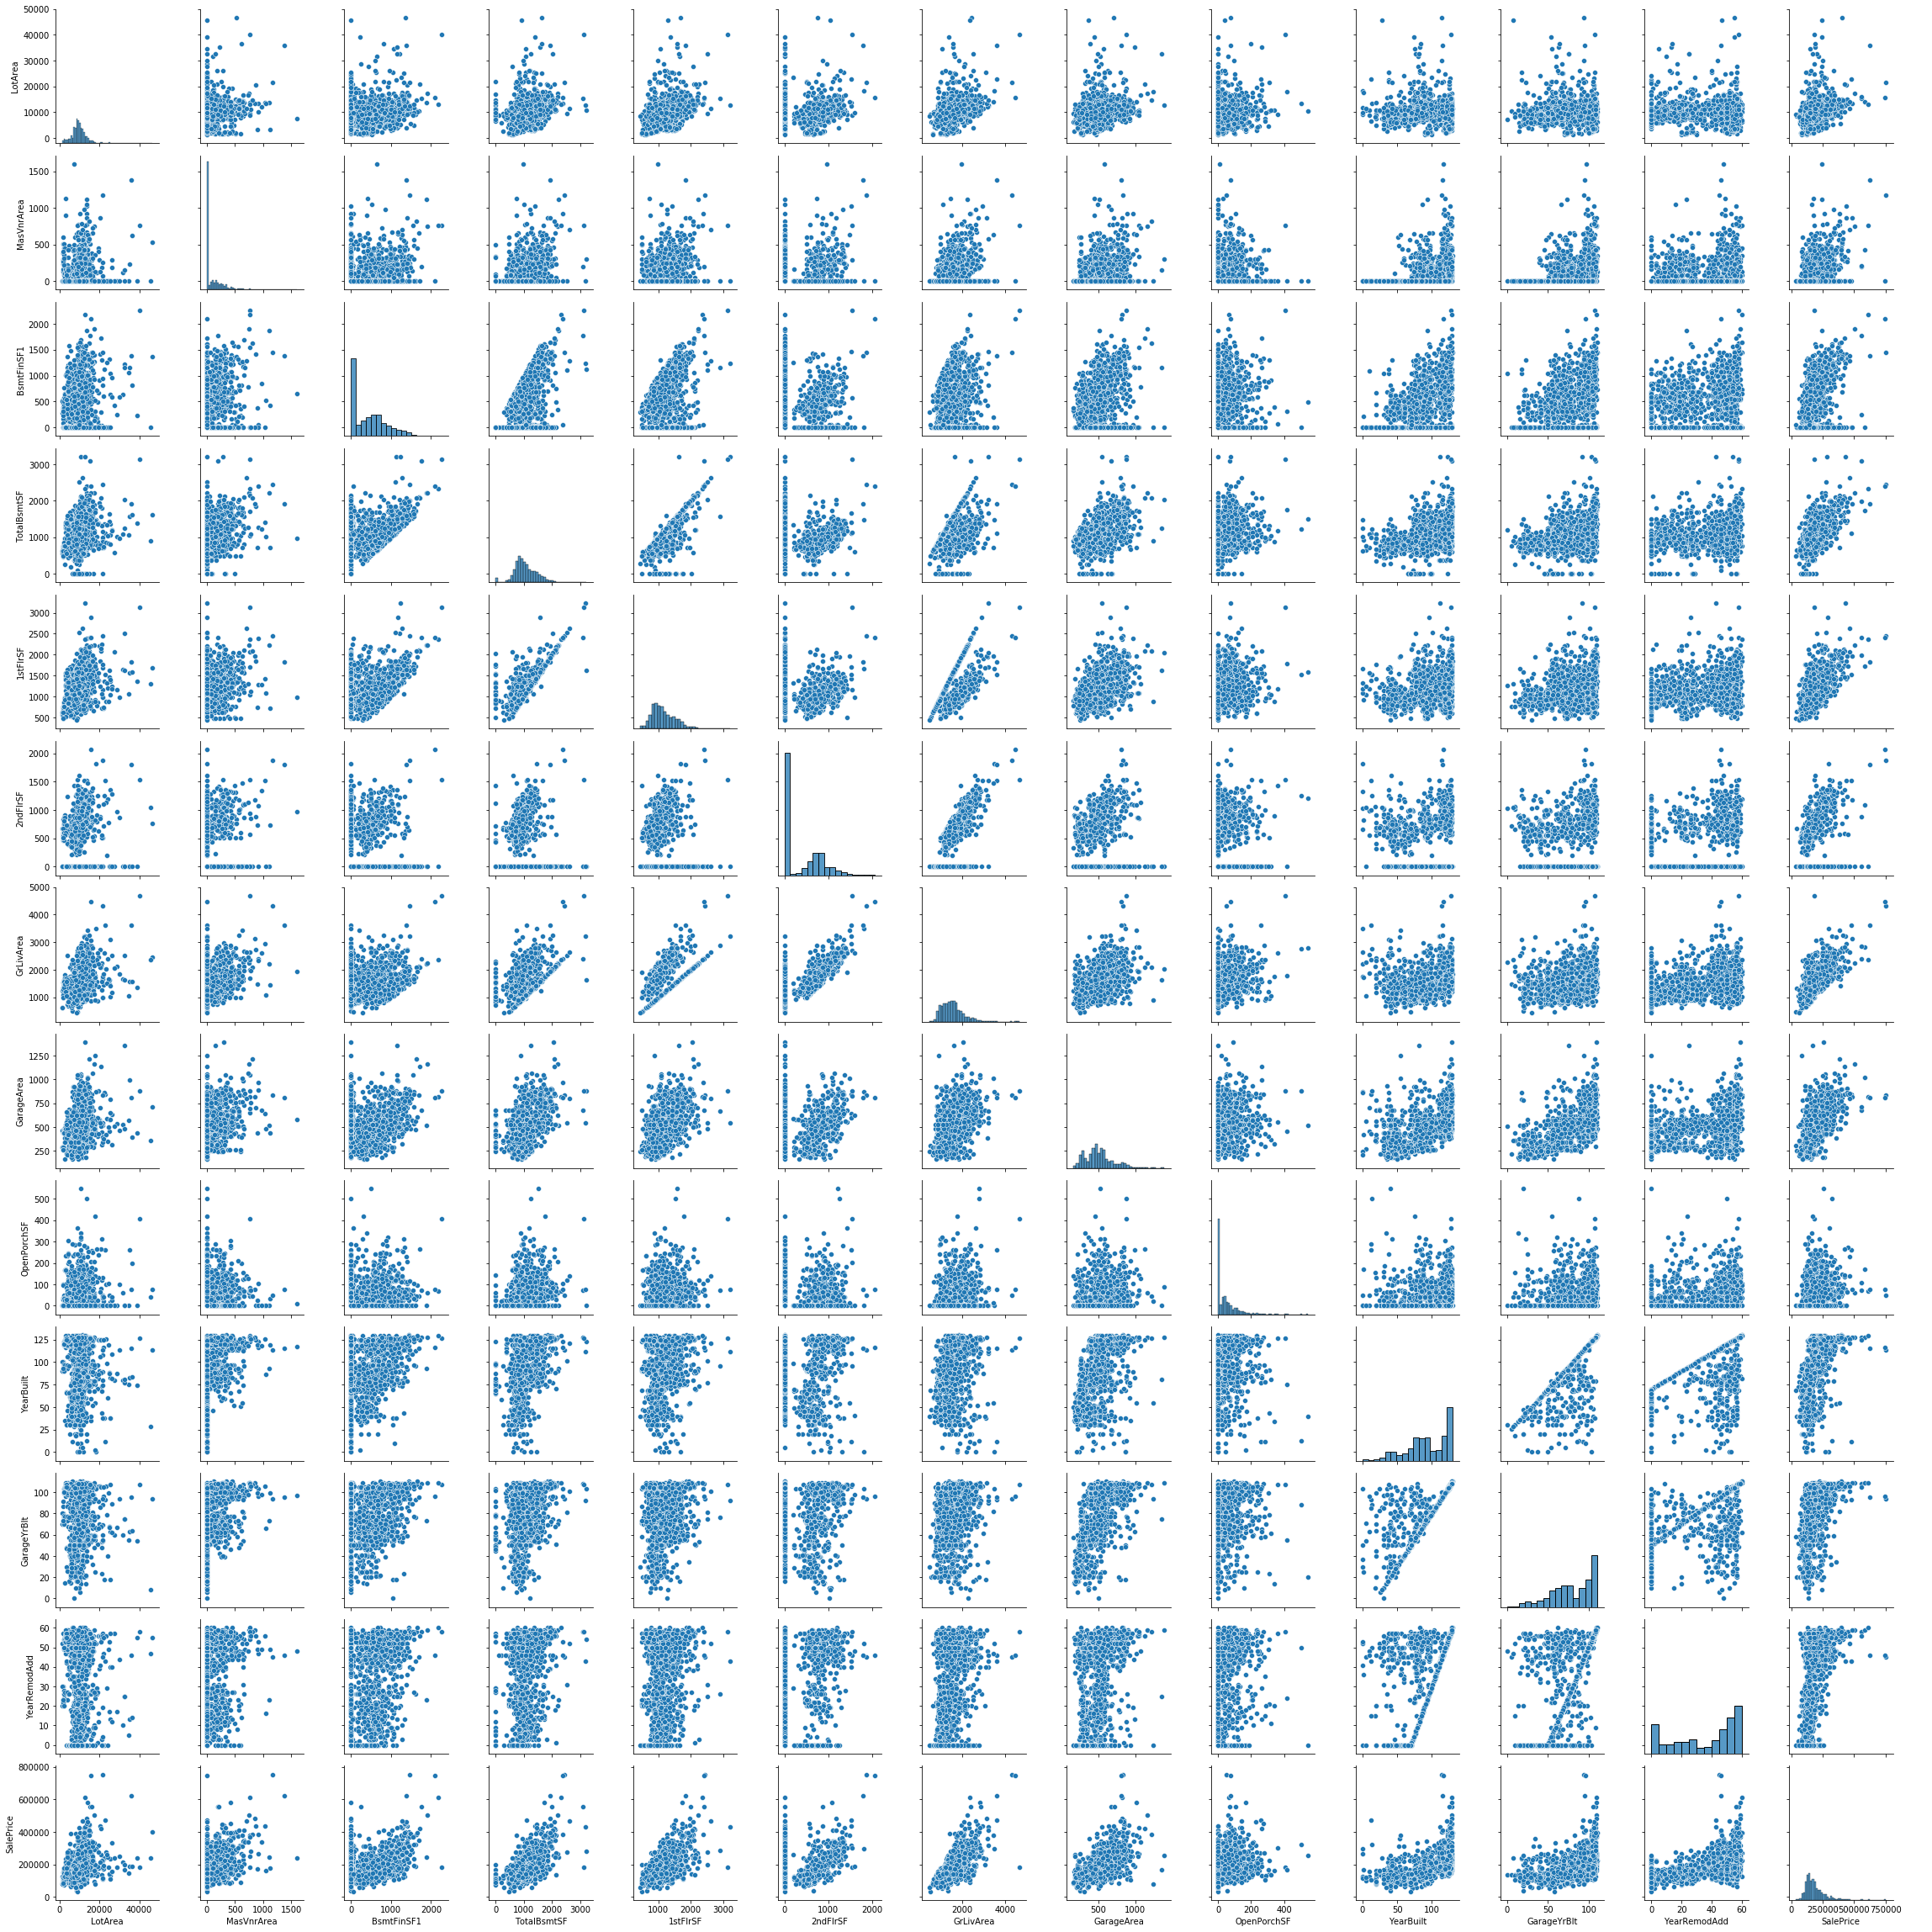

In [927]:
plt.figure(figsize=(40,20))
sns.pairplot(house_df[imp_continuous_vars])
plt.show()

We can see in last row the above graph that most of these continuous independent variables have linear relationship with the targer vaiable SalePrice.

### Visualizing the relationship using correlation matrix and heatmap

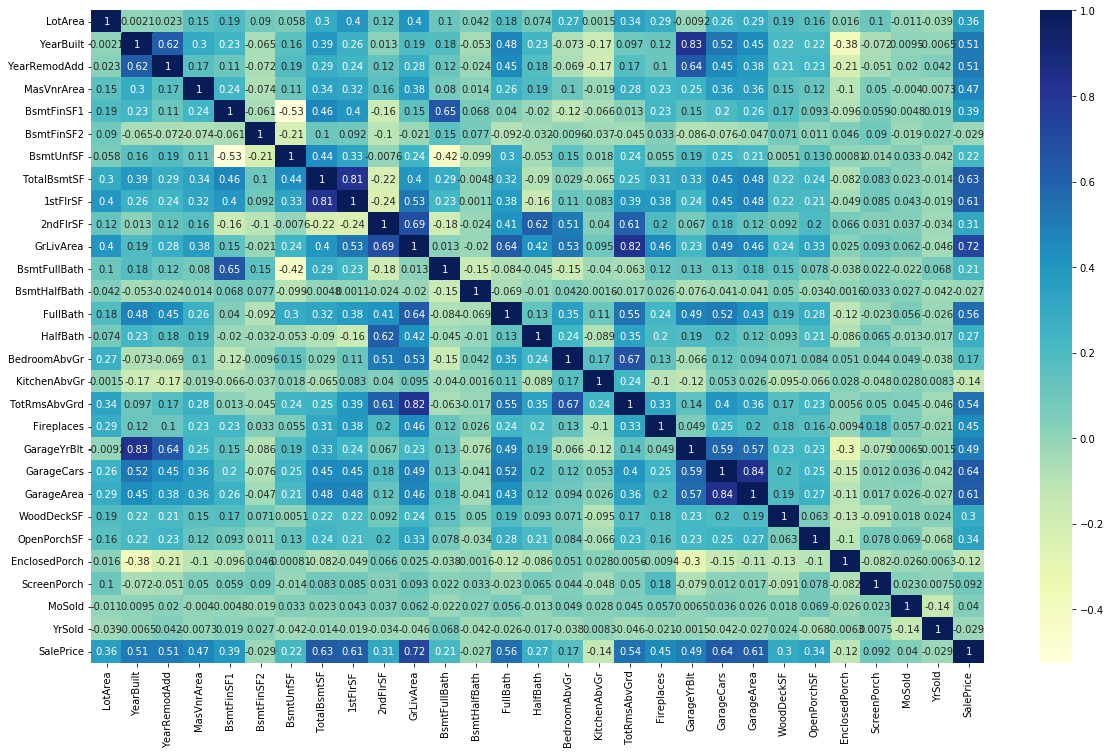

In [928]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(house_df[continuous_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that most of these continuous independent variables have linear relationship with the targer vaiable SalePrice.

### Visualizing the relationship between Categorical and Target variable

**Let's get the relationship between the categorical variable and target variable with help of BOX Plot.** 

In [929]:
cat_col_val = house_df.select_dtypes(include=['object'])
cat_col_val.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition
0         60       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
1         20       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story           6           8     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
2         60       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal
3         70       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story           7           5     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ     Detchd          Unf         TA         TA          Y       WD       Abnorml
4         60       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story           8           5     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ     Attchd          RFn         TA         TA          Y       WD        Normal

<Figure size 432x288 with 0 Axes>

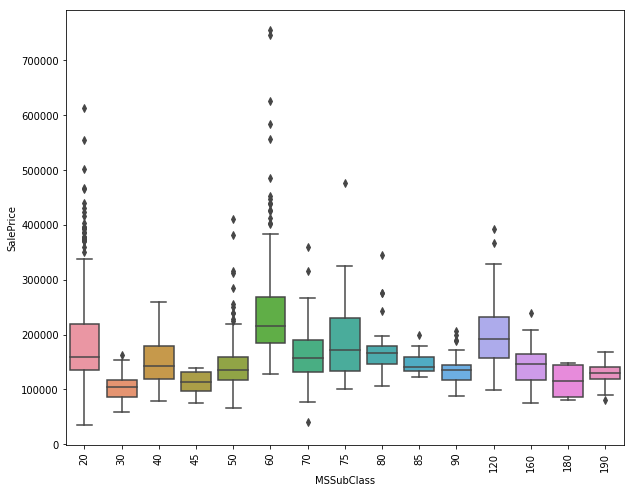

<Figure size 432x288 with 0 Axes>

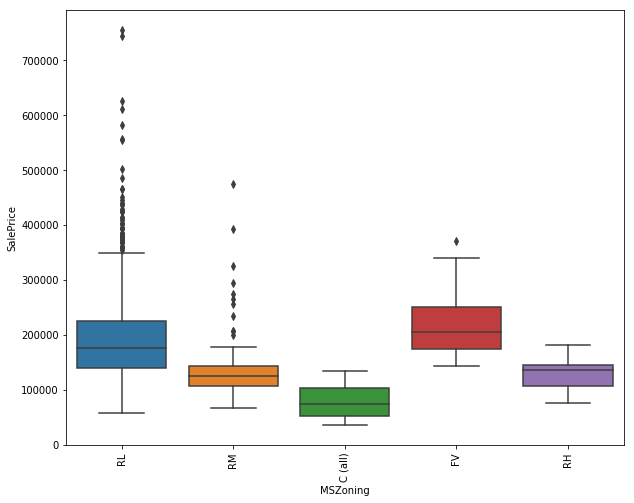

<Figure size 432x288 with 0 Axes>

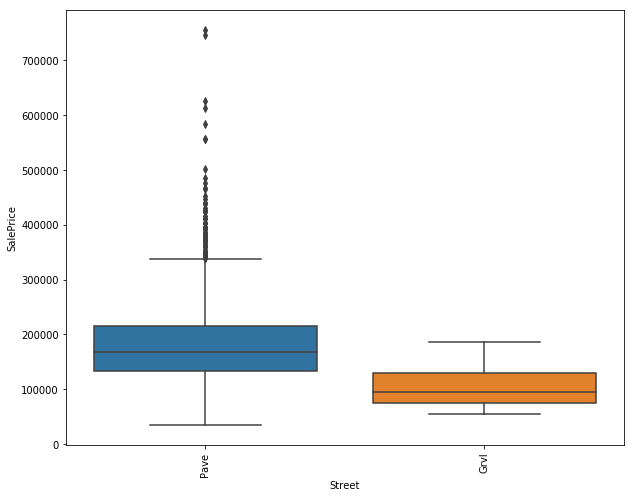

<Figure size 432x288 with 0 Axes>

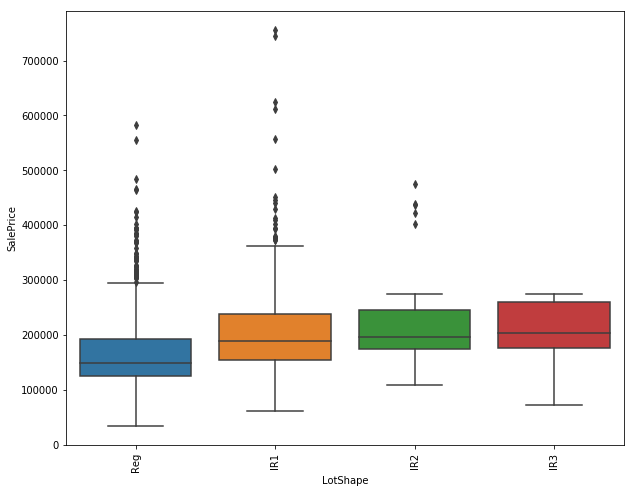

<Figure size 432x288 with 0 Axes>

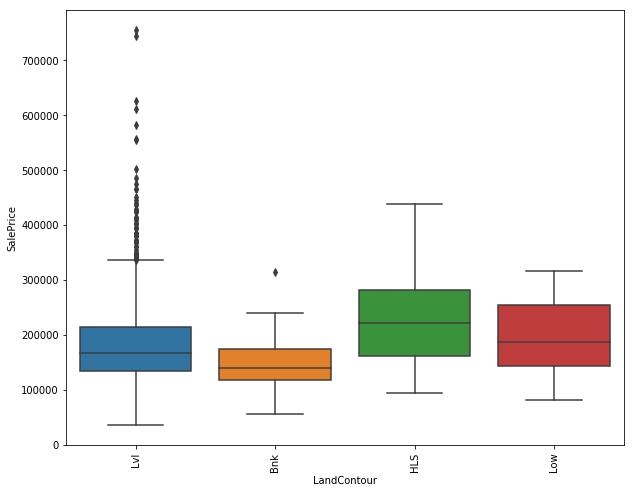

<Figure size 432x288 with 0 Axes>

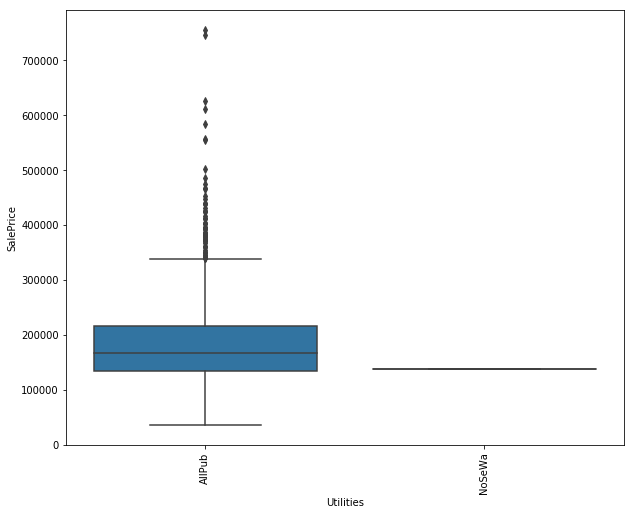

<Figure size 432x288 with 0 Axes>

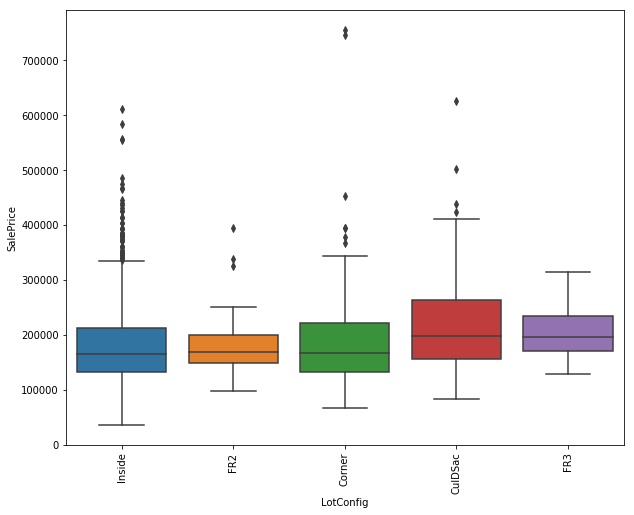

<Figure size 432x288 with 0 Axes>

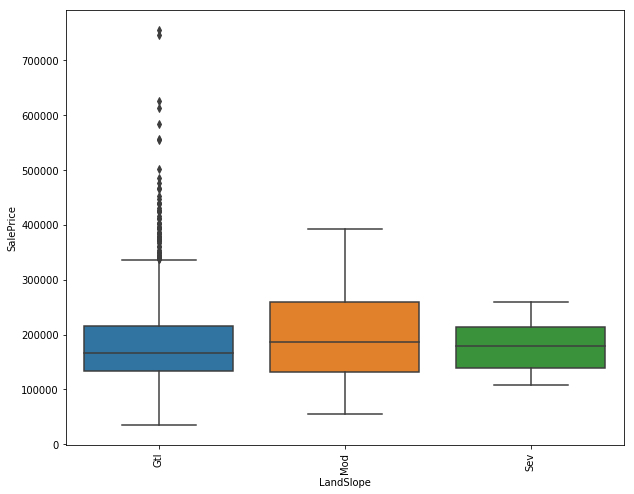

<Figure size 432x288 with 0 Axes>

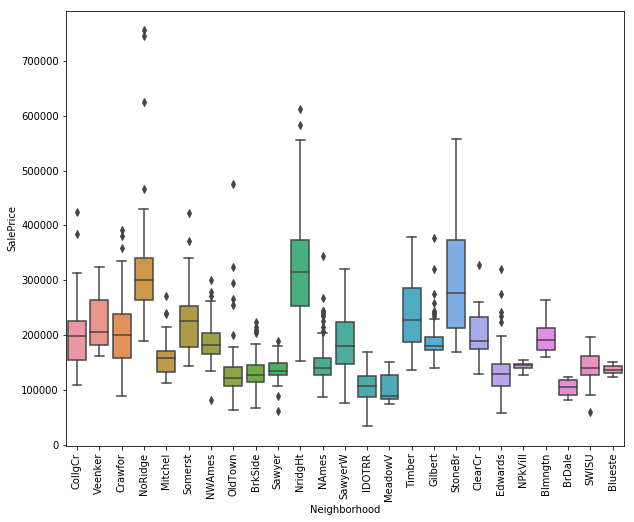

<Figure size 432x288 with 0 Axes>

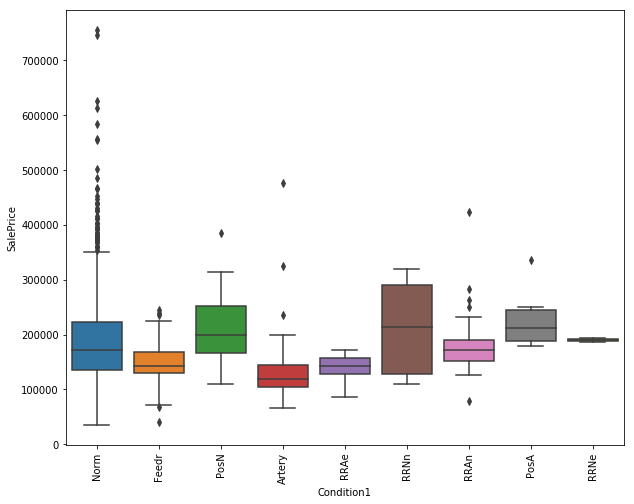

<Figure size 432x288 with 0 Axes>

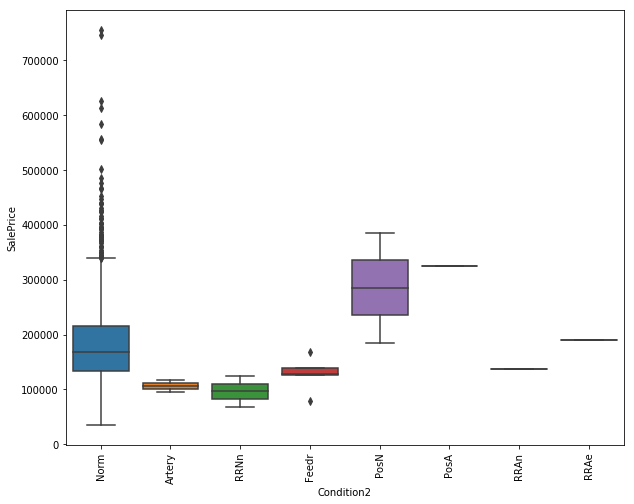

<Figure size 432x288 with 0 Axes>

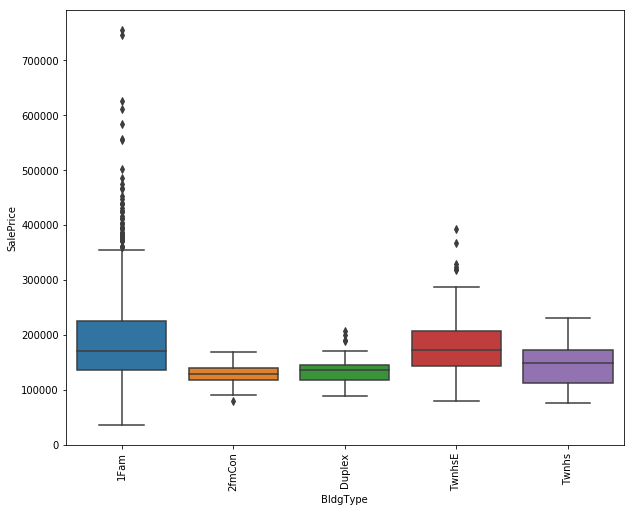

<Figure size 432x288 with 0 Axes>

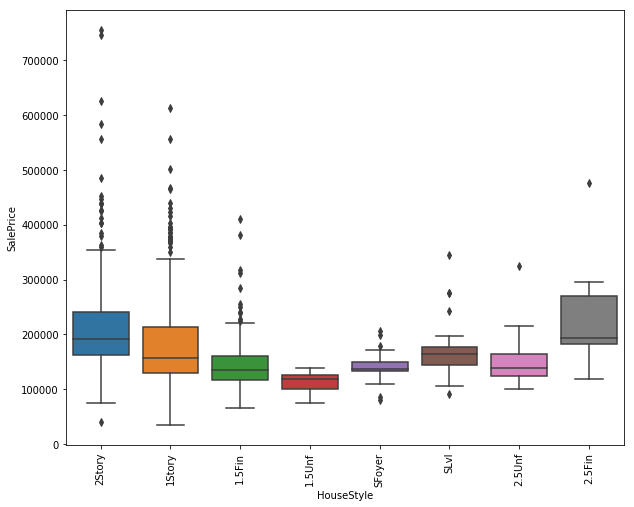

<Figure size 432x288 with 0 Axes>

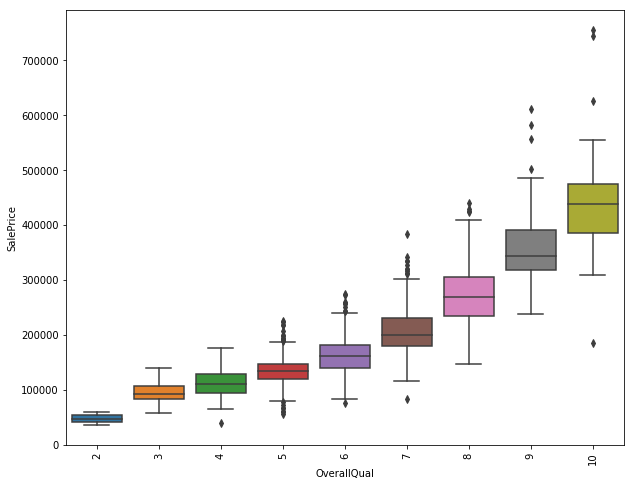

<Figure size 432x288 with 0 Axes>

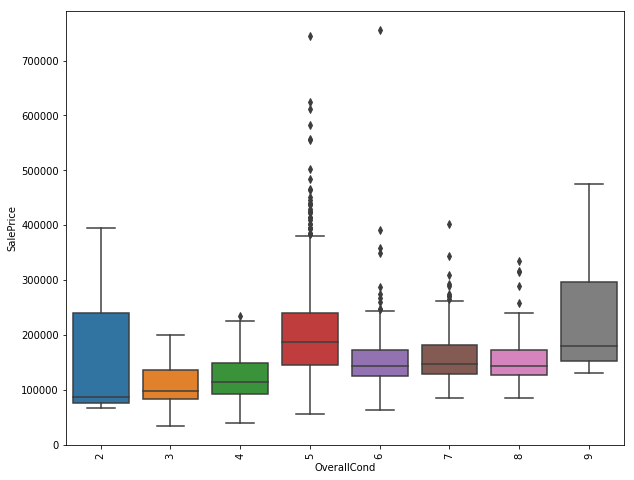

<Figure size 432x288 with 0 Axes>

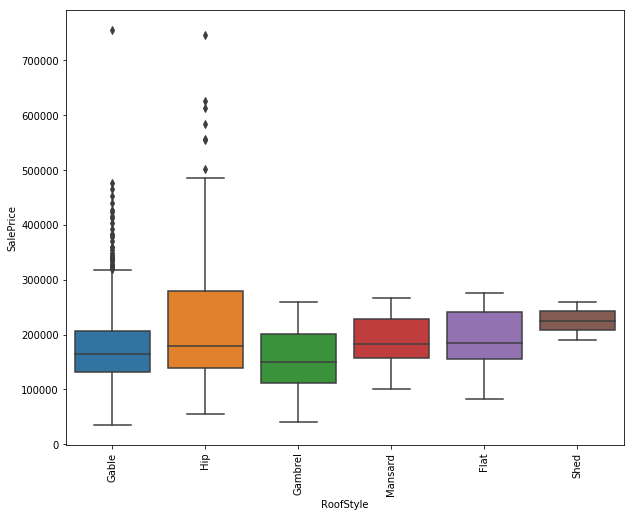

<Figure size 432x288 with 0 Axes>

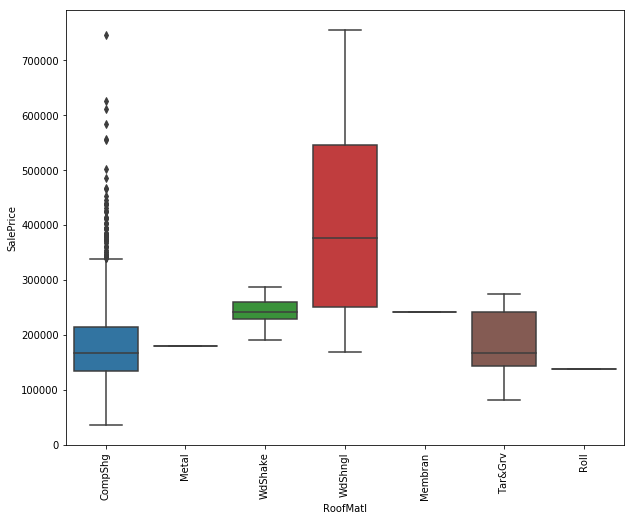

<Figure size 432x288 with 0 Axes>

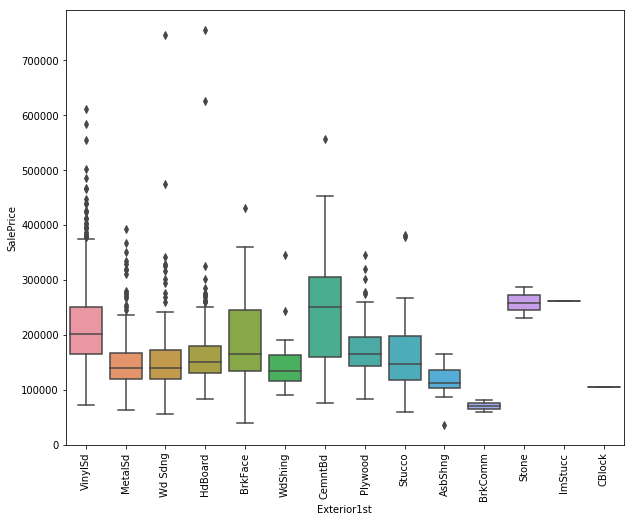

<Figure size 432x288 with 0 Axes>

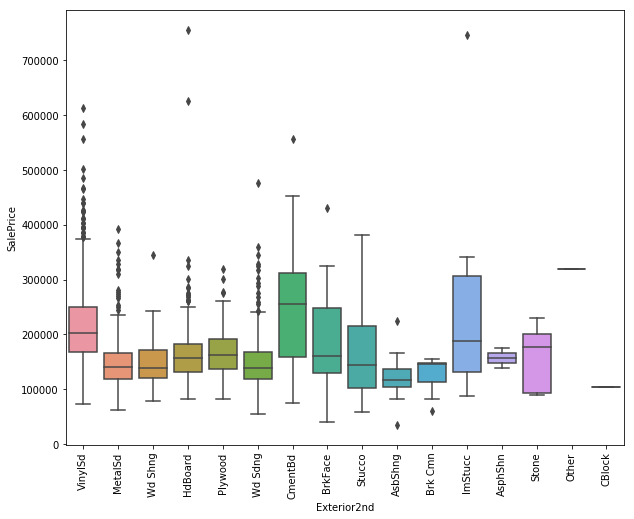

<Figure size 432x288 with 0 Axes>

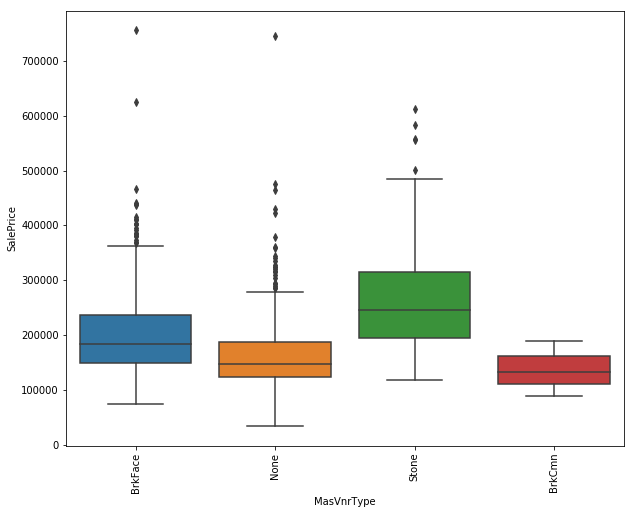

<Figure size 432x288 with 0 Axes>

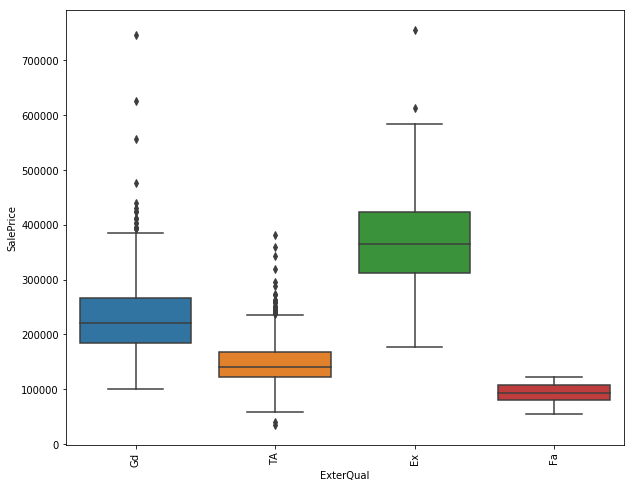

<Figure size 432x288 with 0 Axes>

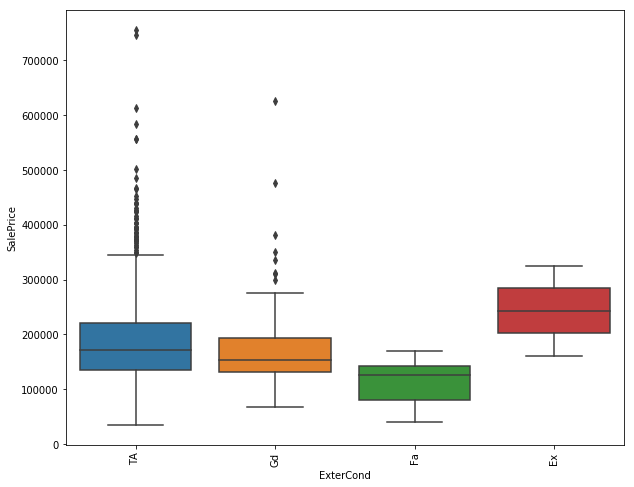

<Figure size 432x288 with 0 Axes>

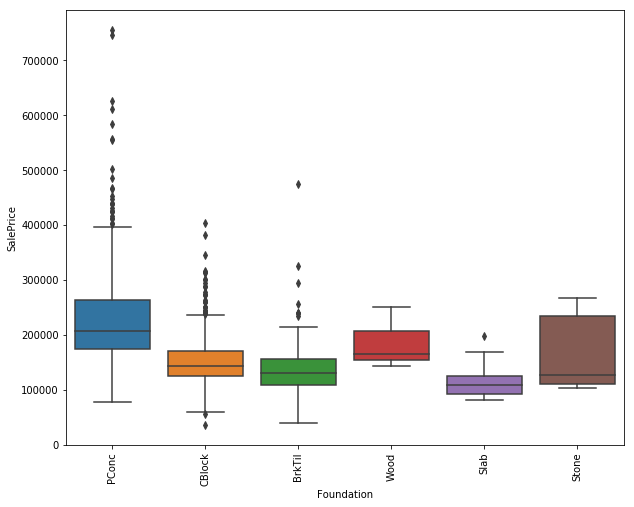

<Figure size 432x288 with 0 Axes>

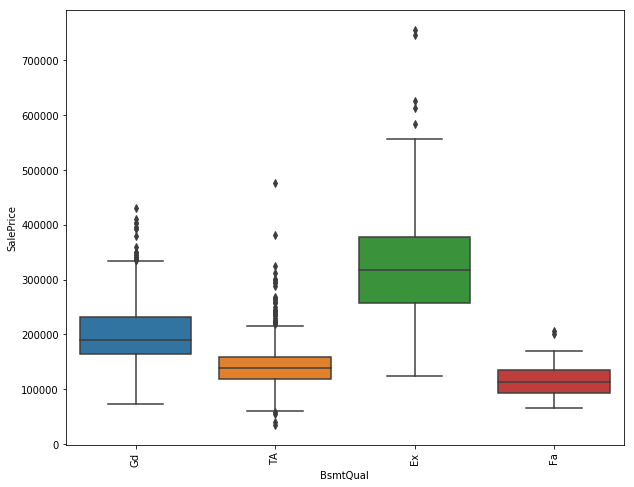

<Figure size 432x288 with 0 Axes>

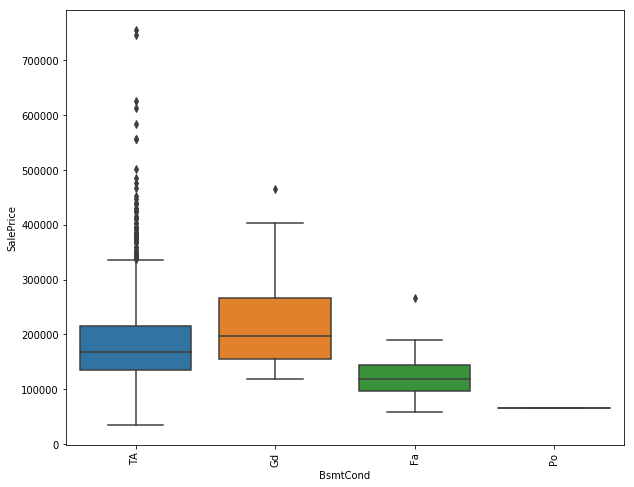

<Figure size 432x288 with 0 Axes>

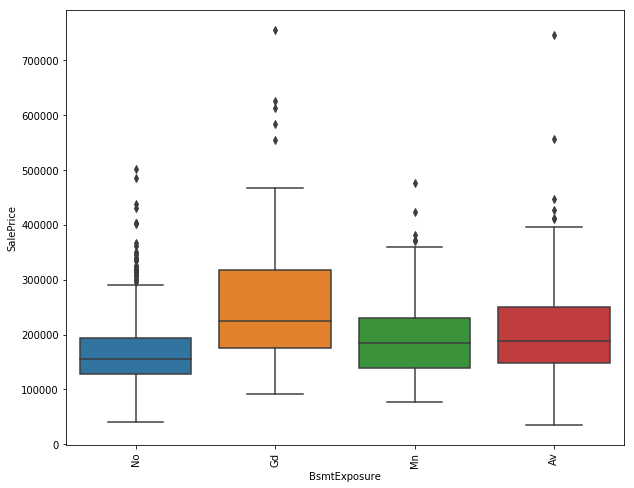

<Figure size 432x288 with 0 Axes>

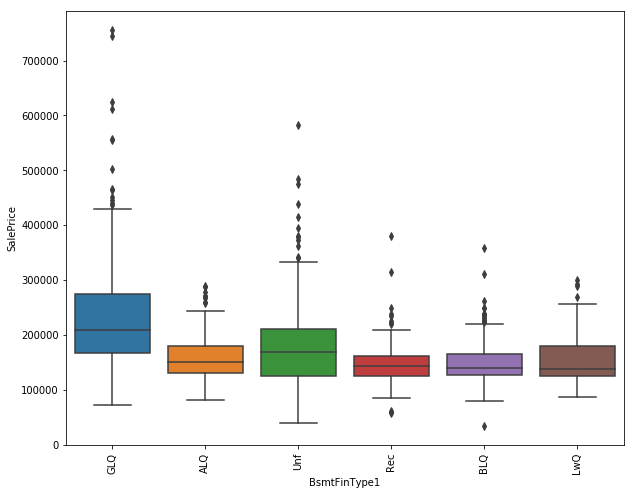

<Figure size 432x288 with 0 Axes>

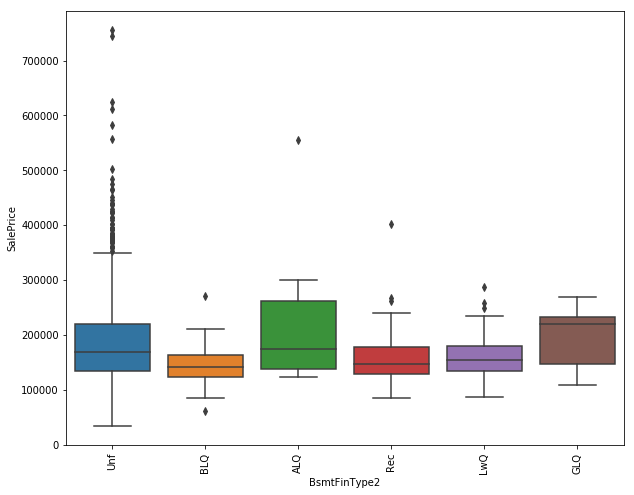

<Figure size 432x288 with 0 Axes>

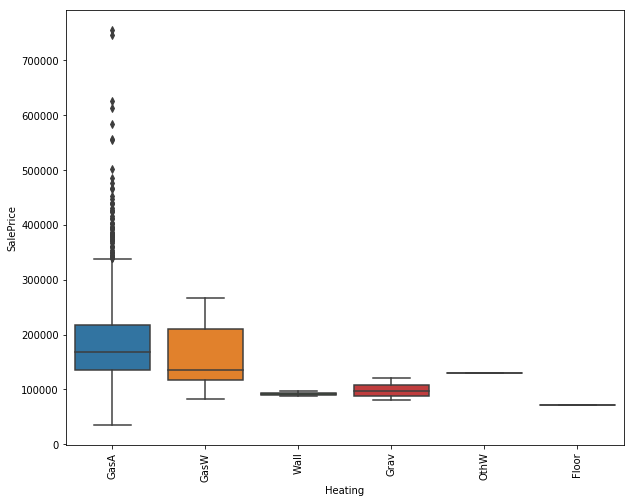

<Figure size 432x288 with 0 Axes>

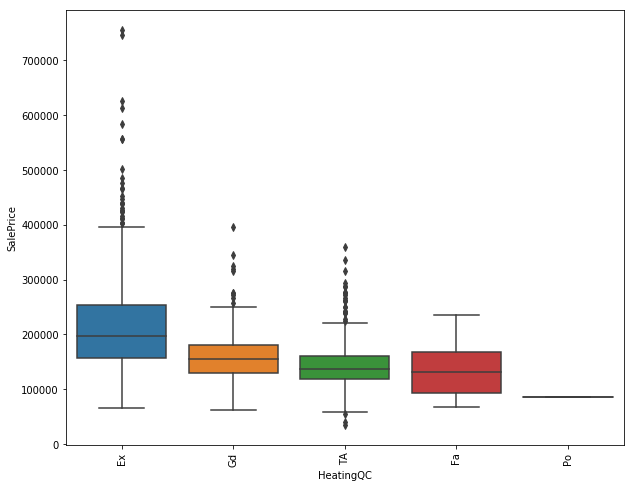

<Figure size 432x288 with 0 Axes>

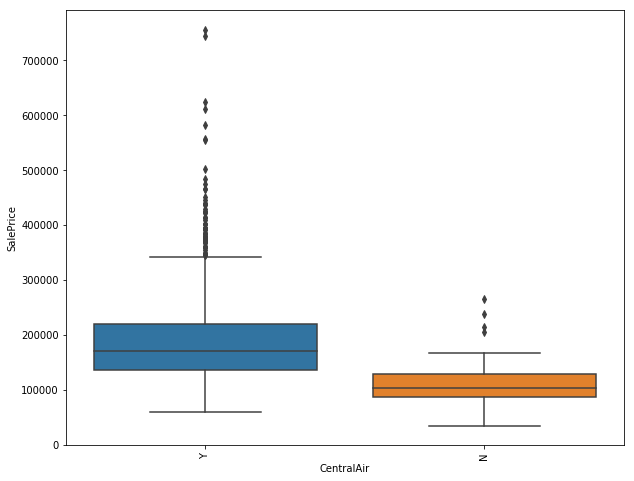

<Figure size 432x288 with 0 Axes>

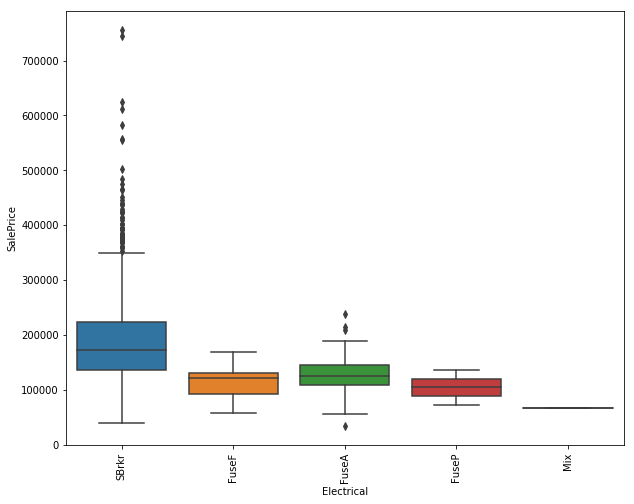

<Figure size 432x288 with 0 Axes>

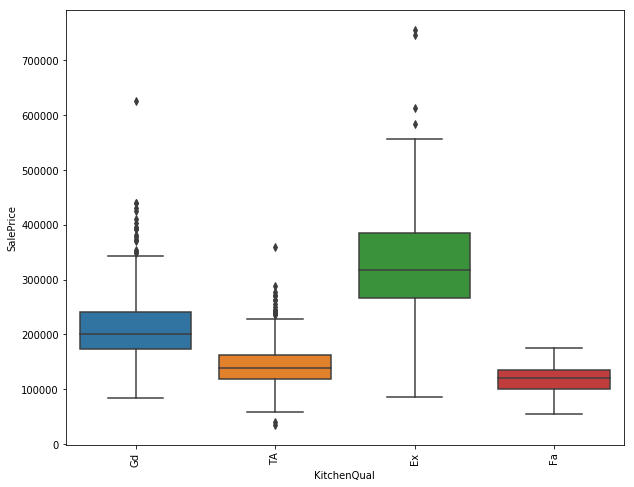

<Figure size 432x288 with 0 Axes>

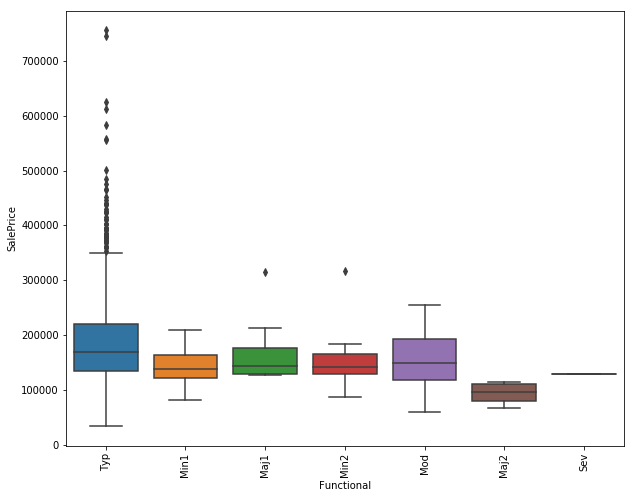

<Figure size 432x288 with 0 Axes>

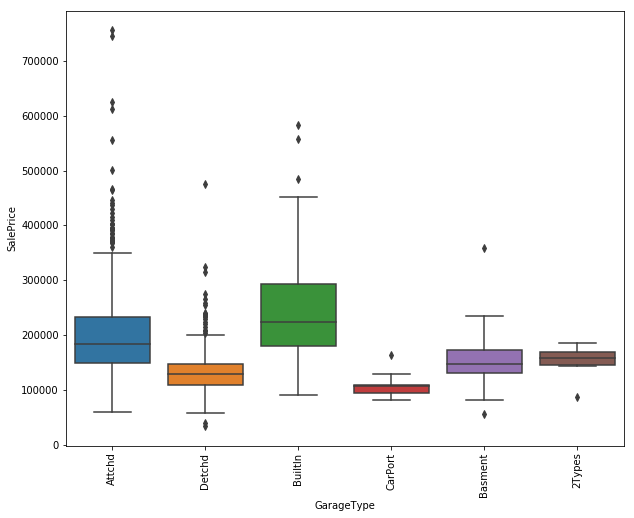

<Figure size 432x288 with 0 Axes>

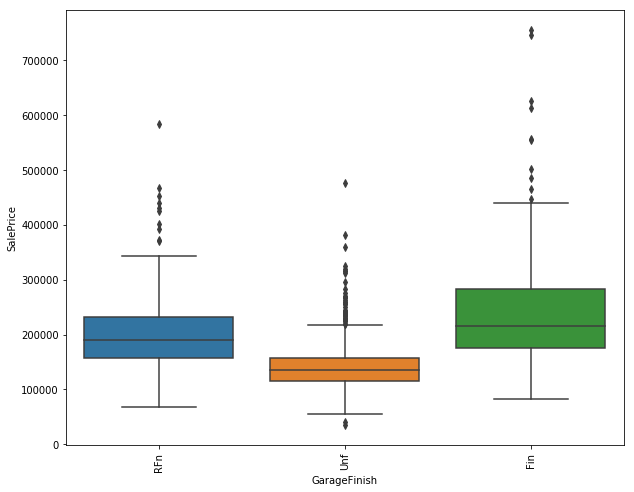

<Figure size 432x288 with 0 Axes>

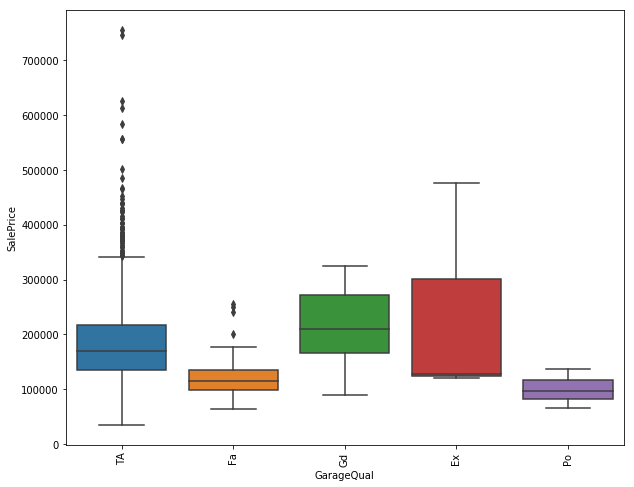

<Figure size 432x288 with 0 Axes>

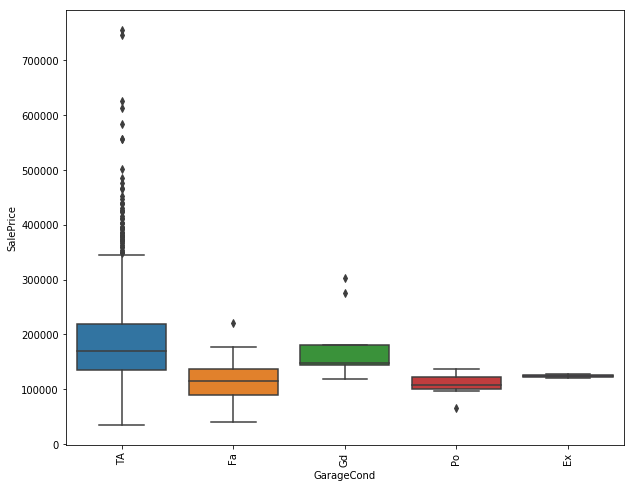

<Figure size 432x288 with 0 Axes>

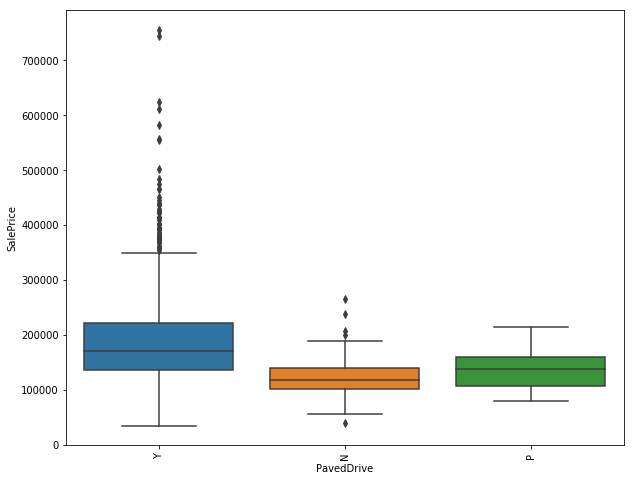

<Figure size 432x288 with 0 Axes>

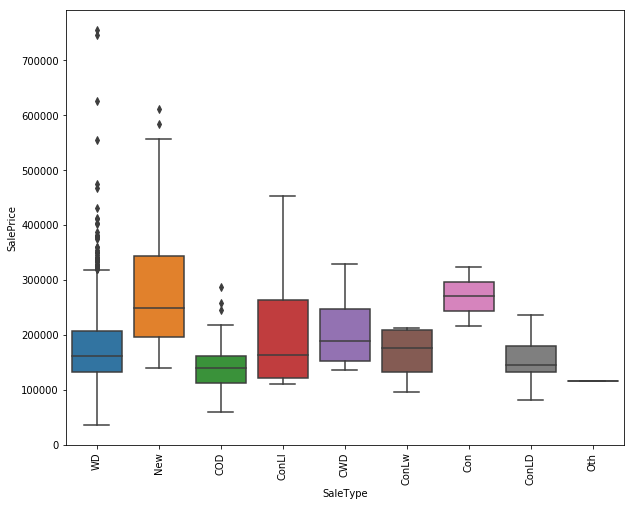

<Figure size 432x288 with 0 Axes>

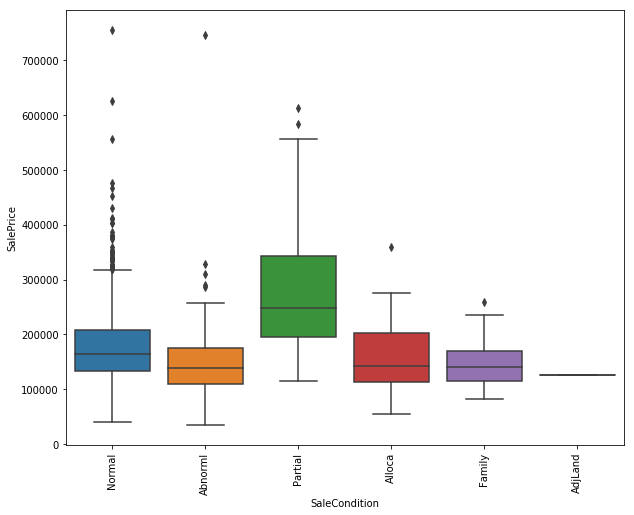

In [930]:
cat_cols = list(cat_col_val.columns)
for i in range(len(cat_cols)):
    plt.figure(i+1)
    plt.figure(figsize=(10, 8))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    sns.boxplot(x = cat_cols[i], y = 'SalePrice', data = house_df)
    plt.show()

In [931]:
#Check if any column has only single value
for col in house_df.columns:
    if len(house_df[col].unique()) == 1:
        print(col)

Let's see distributin of some Binary Columns

In [932]:
binary_col = []
for col in house_df.columns:
    if len(house_df[col].unique()) == 2:
        binary_col.append(col)
print(binary_col)

['Street', 'Utilities', 'CentralAir']


In [933]:
house_df['Street'].value_counts()

Pave    1364
Grvl       4
Name: Street, dtype: int64

In [934]:
house_df['Utilities'].value_counts()

AllPub    1367
NoSeWa       1
Name: Utilities, dtype: int64

In [935]:
house_df['CentralAir'].value_counts()

Y    1299
N      69
Name: CentralAir, dtype: int64

Looking into skewness of the Stree and Utilities, we can drop these columns. As they are not going to impact the outcome much. For now we are leaving them to part of predictors. Let model decide.

In [572]:
#house_df.drop(['Utilities'], axis=1, inplace=True)
house_df.shape

(1368, 70)

In [936]:
#Map column CentralAir to binary numbers 0 and 1
house_df['CentralAir'] = house_df['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)
house_df['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [937]:
house_df['CentralAir'].value_counts()

1    1299
0      69
Name: CentralAir, dtype: int64

# Data Preprocessing - Dummy Encoding, Spliting and Scaling

In [938]:
cat_col_val = house_df.select_dtypes(include=['object'])
dummy_df = pd.get_dummies(cat_col_val, drop_first=True)
dummy_df.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
1              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             1                0                0                1                 0                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
2              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0   
3              0              0              0 

In [939]:
# Dropping the original categorical variables 
house_df = house_df.drop(list(cat_col_val.columns), axis=1)
house_df.shape

(1368, 30)

In [940]:
dataset = pd.concat([house_df, dummy_df], axis=1)
dataset.shape

(1368, 251)

# Train-Test Splitting of the dataset

In [941]:
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [942]:
df_train.shape

(957, 251)

In [943]:
df_test.shape

(411, 251)

In [944]:
# Apply scaler() to all the numric column variables.
scaler = MinMaxScaler()

#I have left below commented to share that I have tried both with scaling and with scaling of Traget Varible. 
#I have got same result with both of them. 

#y_train = df_train.pop('SalePrice')
#X_train = df_train

#y_test = df_test.pop('SalePrice')
#X_test = df_test

#num_vars = list(X_train.select_dtypes(include = ['int64', 'float64']).columns)
#X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
#X_test[num_vars] = scaler.transform(X_test[num_vars])
#X_train.head()

num_vars = list(df_train.select_dtypes(include = ['int64', 'float64']).columns)

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_train.head()

LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  SalePrice  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
179   0.159421   0.330769      0.933333    0.000000    0.000000         0.0   0.449605     0.302500         1.0  0.189964  0.000000   0.125059           0.0           0.0  0.333333       0.0      0.333333           0.0      0.222222    0.000000     0.318182    0.333333    0.260163    0.000000     0.000000       0.333333          0.0  0.545455    0.25   0.057554              1              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            0            1            1             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0   
1276  0.256928   0.707692      0.366667    0.000000    0.262389         0.0   0.060381     0.225938         1.0  0.106452  0.319613   0.225814           0.0           1.0  0.333333       0.5      0.500000           0.0      0.333333    0.333333     0.654545    0.333333    0.273984    0.399457     0.212066       0.000000          0.0  1.000000    0.75   0.146763              0              0              0              0              1              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             0                0                0                1                 0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     0   
776   0.218817   0.961538      0.933333    0.174165    0.008850         0.0   0.740362     0.504375         1.0  0.421505  0.000000   0.277489           0.0           0.0  0.666667       0.0      0.500000           0.0      0.444444    0.000000     0.954545    0.666667    0.573171    0.195652     0.107861       0.000000          0.0  0.545455    0.00   0.232374              0              0              0              0              0              0              0              0              0              0               0               0               0               0            0            0            1            0            1             0             0             0                0                0                1                 0                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0   
671   0.117667   0.346154      0.000000    0.000000    0.243805    

# Model builing abd Evaluation

## Builing Linear Regression Model 

In [945]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [946]:
#Let's create a Linear Regression model with all the independent variable and see the behavior

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     61.15
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        22:27:48   Log-Likelihood:                 2193.6
No. Observations:                 957   AIC:                            -3901.
Df Residuals:                     714   BIC:                            -2719.
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1975      0.069     -2.871      0.004      -0.333      -0.062
LotArea                   0.0783      0.017      4.645      0.000       0.045       0.111
YearBuilt                 0.0801      0.020      3.975      0.000       0.041       0.120
YearRemodAdd              0.0049      0.006      0.808      0.419      -0.007       0.017
MasVnrArea                0.0294      0.014      2.172      0.030       0.003       0.056
BsmtFinSF1                0.0674      0.010      6.484      0.000       0.047       0.088
BsmtFinSF2                0.0244      0.014      1.741      0.082      -0.003       0.052
BsmtUnfSF                 0.0101      0.009      1.091      0.276      -0.008       0.028
TotalBsmtSF               0.0630      0.012      5.043      0.000       0.038       0.087
CentralAir               -0.0046      0.008     -0.578      0.563      -0.020       0.011
1stFlrSF                  0.1758      0.093      1.890      0.059      -0.007       0.358
2ndFlrSF                  0.1471      0.065      2.274      0.023       0.020       0.274
GrLivArea                 0.0782      0.139      0.562      0.574      -0.195       0.351
BsmtFullBath             -0.0019      0.006     -0.292      0.771      -0.014       0.011
BsmtHalfBath             -0.0025      0.005     -0.479      0.632      -0.013       0.008
FullBath                  0.0159      0.011      1.406      0.160      -0.006       0.038
HalfBath                 -0.0018      0.007     -0.257      0.797      -0.016       0.012
BedroomAbvGr             -0.0298      0.015     -2.003      0.046      -0.059      -0.001
KitchenAbvGr             -0.0245      0.030     -0.824      0.410      -0.083       0.034
TotRmsAbvGrd              0.0058      0.014      0.420      0.675      -0.021       0.033
Fireplaces                0.0023      0.006      0.358      0.720      -0.010       0.015
GarageYrBlt              -0.0067      0.012     -0.570      0.569      -0.030       0.016
GarageCars                0.0194      0.011      1.716      0.087      -0.003       0.042
GarageArea                0.0280      0.016      1.750      0.080      -0.003       0.059
WoodDeckSF                0.0064      0.007      0.940      0.347      -0.007       0.020
OpenPorchSF               0.0185      0.010      1.784      0.075      -0.002       0.039
EnclosedPorch             0.0026      0.012      0.223      0.823      -0.020       0.025
ScreenPorch               0.0223      0.009      2.426      0.016       0.004       0.040
MoSold                   -0.0071      0.004     -1.596      0.111      -0.016       0.002
YrSold                    0.0005      0.003      0.162      0.871      -0.006       0.007
MSSubClass_30            -0.0047      0.009     -0.523      0.601      -0.022       0.013
MSSubClass_40          

We can see there are many columns with p-value which are too high to be considered as significant. For sure, we need to come up with a mechanism to select best set of fetures. 

### RFE

Recursive feature elimination

Lets' use RFE for automated dropping of some of the in-significant variables. Let's consider dropping 200 variables and take 20 forward with RFE model. 

In [947]:
# Running RFE with the output number of the variable equal to 15
lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

rfe = RFE(lr_2, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [948]:
col = X_train.columns[rfe.support_]
print(col)

Index(['LotArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'MSSubClass_45', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'OverallQual_9', 'OverallQual_10', 'RoofMatl_Membran', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Functional_Sev', 'SaleType_Con'], dtype='object')


In [949]:
list(X_train.columns[~rfe.support_])

['YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'CentralAir',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MoSold',
 'YrSold',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neig

### Building model using statsmodel with RFE selected columns, for the detailed statistics

In [950]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

#build model
lr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     319.3
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        22:28:30   Log-Likelihood:                 1704.8
No. Observations:                 957   AIC:                            -3368.
Df Residuals:                     936   BIC:                            -3265.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1642    

In [951]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train[col], y_train)

LinearRegression()

In [952]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [953]:
y_pred_train = lm.predict(X_train[col])
y_pred_test = lm.predict(X_test[col])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8721517923368379
0.6863140931851535
1.5891028310525477
1.5230262320073051
0.0016605045256557448
0.0037056599318912534


In [954]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-0.16420509024302507
[ 0.09560879  0.11852828  0.18112747  0.34686805  0.26108416 -0.09200683
 -0.11934153 -0.11017553  0.07650829  0.08520053 -0.73944831  0.11056628
  0.13574773  0.14026119  0.22371205  0.03015201  0.14555689 -0.13997907
 -0.1905752   0.094454  ]


# Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

# Ridge Regression

In [955]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha':  [0.1, 
 0.2, 0.5, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12, 15, 20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0, 12, 15,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [956]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.5}


In [957]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=7.5)

In [958]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')
metric2.append(mse_test_lr**0.5)

R2_Train - 0.9129532624930286
R2_Test - 0.896243593968991
RSS Train - 1.0819566385370085
RSS Test - 0.5037641943452096
MSE Train - 0.0011305712001431645
MSE Test - 0.0012257036358764223


In [959]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.074, 'OverallQual_10'),
 (0.066, 'GrLivArea'),
 (0.059, '1stFlrSF'),
 (0.058, '2ndFlrSF'),
 (-0.053, 'Condition2_PosN'),
 (0.051, 'TotalBsmtSF'),
 (0.05, 'BsmtFinSF1'),
 (0.05, 'Neighborhood_NoRidge'),
 (0.045, 'OverallQual_9'),
 (0.036, 'TotRmsAbvGrd'),
 (0.034, 'FullBath'),
 (-0.034, 'KitchenQual_Gd'),
 (0.033, 'Condition2_Norm'),
 (0.033, 'RoofMatl_WdShngl'),
 (-0.033, 'KitchenQual_TA'),
 (0.03, 'MasVnrArea'),
 (0.029, 'Neighborhood_StoneBr'),
 (-0.029, 'OverallQual_5'),
 (0.028, 'GarageArea'),
 (-0.028, 'OverallQual_4'),
 (-0.028, 'OverallQual_6'),
 (0.028, 'Exterior1st_BrkFace'),
 (-0.028, 'BsmtQual_Gd'),
 (0.027, 'GarageCars'),
 (-0.027, 'BsmtQual_TA'),
 (0.026, 'Fireplaces'),
 (-0.026, 'Neighborhood_Edwards'),
 (0.025, 'BsmtExposure_Gd'),
 (0.022, 'Neighborhood_Crawfor'),
 (-0.021, 'KitchenAbvGr'),
 (-0.021, 'OverallCond_3'),
 (0.02, 'LotArea'),
 (0.02, 'YearBuilt'),
 (-0.02, 'ExterQual_TA'),
 (-0.02, 'KitchenQual_Fa'),
 (0.019, 'BsmtUnfSF'),
 (-0.019, 'OverallQual_7'),
 (0.

## Lasso

In [960]:
params = {'alpha': [0.00005,0.0001, 0.00011, 0.00013, 0.00014, 0.00015, 0.00016, 0.0002, 0.0003, 0.0004, 
                    0.0006, 0.0007, 0.0008, 0.0009, 0.01, 0.05]}

# Param list if the target variable is not scaled
#params = {'alpha': [100, 101,105, 107, 110, 120, 150, 200, 300, 350]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.00011, 0.00013, 0.00014,
                                   0.00015, 0.00016, 0.0002, 0.0003, 0.0004,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.01,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [961]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.00014}


In [962]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.00014)

In [963]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')
metric3.append(mse_test_lr**0.5)

R2_Train - 0.9388712865704187
R2_Test - 0.8492714236834054
RSS Train - 0.7598058146069506
RSS Test - 0.731826233362753
MSE Train - 0.0007939454698087259
MSE Test - 0.0017805991079385718


In [964]:
#After some manual tuning to get best test score,Fitting Lasso model for alpha = 0.00035
alpha = 0.00035
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.00035)

In [965]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')
metric4.append(mse_test_lr**0.5)

R2_Train - 0.915100206570713
R2_Test - 0.8835588480797233
RSS Train - 1.055270969849743
RSS Test - 0.565351917338148
MSE Train - 0.0011026864888712047
MSE Test - 0.0013755521103117957


In [966]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.299, 'GrLivArea'),
 (-0.267, 'Condition2_PosN'),
 (0.163, 'OverallQual_10'),
 (0.102, 'OverallQual_9'),
 (0.085, 'TotalBsmtSF'),
 (0.043, 'BsmtFinSF1'),
 (0.039, 'Neighborhood_NoRidge'),
 (0.028, 'SaleCondition_Partial'),
 (-0.027, 'KitchenAbvGr'),
 (0.027, 'OverallQual_8'),
 (-0.025, 'KitchenQual_TA'),
 (0.024, 'YearBuilt'),
 (0.024, 'GarageCars'),
 (0.024, 'GarageArea'),
 (0.024, 'Exterior1st_BrkFace'),
 (-0.024, 'KitchenQual_Gd'),
 (0.023, 'constant'),
 (0.021, 'Fireplaces'),
 (0.021, 'Neighborhood_Crawfor'),
 (0.021, 'BsmtExposure_Gd'),
 (0.02, 'YearRemodAdd'),
 (-0.018, 'BsmtQual_Gd'),
 (-0.018, 'BsmtQual_TA'),
 (-0.017, 'OverallCond_3'),
 (-0.017, 'OverallCond_4'),
 (0.017, 'Functional_Typ'),
 (-0.013, 'OverallQual_4'),
 (-0.012, 'Neighborhood_Edwards'),
 (-0.01, 'OverallQual_5'),
 (-0.01, 'OverallQual_6'),
 (-0.01, 'ExterQual_TA'),
 (-0.009, 'Neighborhood_OldTown'),
 (0.009, 'Condition1_Norm'),
 (0.009, 'BsmtFinType1_GLQ'),
 (0.008, 'Condition2_Norm'),
 (-0.008, 'OverallCond

## Below is the list of features with are selected by the Lasso model. 

** This help us explaining the important features to the business team **

In [967]:
lasso_selected_features

['Condition2_PosN',
 'OverallQual_10',
 'OverallQual_9',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'Neighborhood_NoRidge',
 'SaleCondition_Partial',
 'KitchenAbvGr',
 'OverallQual_8',
 'KitchenQual_TA',
 'YearBuilt',
 'GarageCars',
 'GarageArea',
 'Exterior1st_BrkFace',
 'KitchenQual_Gd',
 'constant',
 'Fireplaces',
 'Neighborhood_Crawfor',
 'BsmtExposure_Gd',
 'YearRemodAdd',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'OverallCond_3',
 'OverallCond_4',
 'Functional_Typ',
 'OverallQual_4',
 'Neighborhood_Edwards',
 'OverallQual_5',
 'OverallQual_6',
 'ExterQual_TA']

In [801]:
params = {'alpha': [0.00005,0.0001, 0.00011, 0.00013, 0.00014, 0.00015, 0.00016, 0.0002, 0.0003, 0.0004, 
                    0.0006, 0.0007, 0.0008, 0.0009, 0.01, 0.05]}

# Param list if the target variable is not scaled
#params = {'alpha': [100, 101,105, 107, 110, 120, 150, 200, 300, 350]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.00011, 0.00013, 0.00014,
                                   0.00015, 0.00016, 0.0002, 0.0003, 0.0004,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.01,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [802]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.00014}


In [818]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.00035)

In [845]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')
metric3.append(mse_test_lr**0.5)

R2_Train - 0.915100206570713
R2_Test - 0.8835588480797233
RSS Train - 1.055270969849743
RSS Test - 0.565351917338148
MSE Train - 0.0011026864888712047
MSE Test - 0.0013755521103117957


Let's Print a dataframe with the metric scores for RFE, Ridge and Lasso

In [968]:
result_dict = {"Ridge Regression":metric2, "Lasso Regression":metric4, "RFE Linear":metric}
result_metrices = pd.DataFrame(result_dict, index=["R2 Score (Train)", "R2 Score (Test)", "RSS (Train)", "RSS (Test)", "MSE (Train)", "MSE (Test)"])
result_metrices

Ridge Regression  Lasso Regression  RFE Linear
R2 Score (Train)          0.912953          0.915100    0.872152
R2 Score (Test)           0.896244          0.883559    0.686314
RSS (Train)               1.081957          1.055271    1.589103
RSS (Test)                0.503764          0.565352    1.523026
MSE (Train)               0.033624          0.033207    0.040749
MSE (Test)                0.035010          0.037088    0.060874

In [969]:
def build_lr_model(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*100)
    print(f' Model Parameters obtained are {cols}')
    print('='*100)
    print(lr.params)
    print('='*100,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*100)
    print(lr.summary())
    print('='*100,'\n')
    
     # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*100)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*100)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*100)

In [970]:
lasso_selected_features.remove('constant')

In [971]:
build_lr_model(lasso_selected_features)

 Model Parameters obtained are ['Condition2_PosN', 'OverallQual_10', 'OverallQual_9', 'TotalBsmtSF', 'BsmtFinSF1', 'Neighborhood_NoRidge', 'SaleCondition_Partial', 'KitchenAbvGr', 'OverallQual_8', 'KitchenQual_TA', 'YearBuilt', 'GarageCars', 'GarageArea', 'Exterior1st_BrkFace', 'KitchenQual_Gd', 'Fireplaces', 'Neighborhood_Crawfor', 'BsmtExposure_Gd', 'YearRemodAdd', 'BsmtQual_Gd', 'BsmtQual_TA', 'OverallCond_3', 'OverallCond_4', 'Functional_Typ', 'OverallQual_4', 'Neighborhood_Edwards', 'OverallQual_5', 'OverallQual_6', 'ExterQual_TA']
const                    0.106241
Condition2_PosN         -0.577280
OverallQual_10           0.307854
OverallQual_9            0.134140
TotalBsmtSF              0.100119
BsmtFinSF1               0.055240
Neighborhood_NoRidge     0.084242
SaleCondition_Partial    0.025975
KitchenAbvGr            -0.036811
OverallQual_8            0.034380
KitchenQual_TA          -0.032176
YearBuilt                0.011877
GarageCars               0.033761
GarageArea     

## Step 4: Residual Analysis of the train data

We will do Residual Analysis by validating the assumptions for the Linear Regession

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Let's first create Linear Model using the variables selected by Lasso and do residual analysis. 

In [972]:
# Instantiate
lm_2 = LinearRegression()

# Fit a line
lm_2.fit(X_train[lasso_selected_features], y_train)

LinearRegression()

In [973]:
y_train_pred = lm_2.predict(X_train[lasso_selected_features])

## Normal Distribution of the Error terms

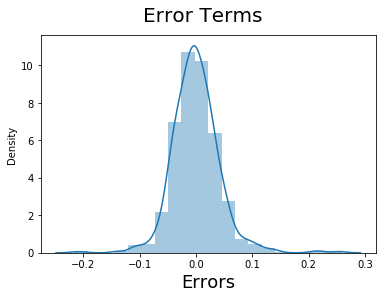

In [974]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**From the above ploted graph we can clearly see that the Error terms are normaly distributed and the mean of the graph is almost 0. So, we are passing one of the assumptions of the linear regression.**

### Homoscedasticity (equal variance) of residuals

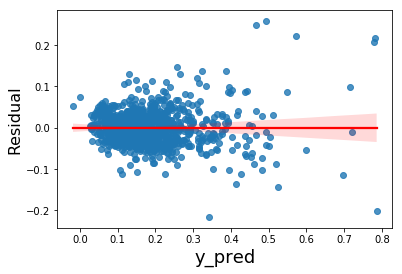

In [975]:
res = (y_train - y_train_pred)

sns.regplot(x=y_train_pred, y=res, line_kws={'color': 'red'})
fig.suptitle('residual vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)
plt.show()

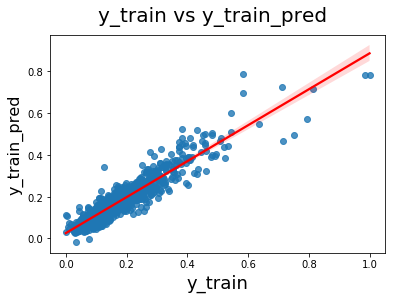

In [976]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

**We can see in the above plots that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. Based on both the above inference we can roughly say that there constant variance of error terms.**

Text(0,0.5,'Views')

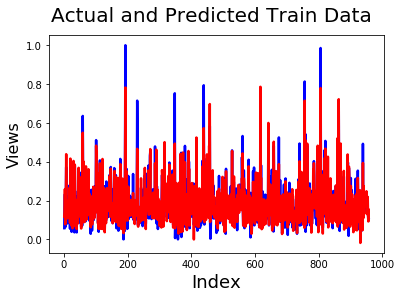

In [977]:
#Actual vs Predicted
c = [i for i in range(1,958,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted Train Data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16) 

# Assignment II related code

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

What will be the most important predictor variables after the change is implemented?

In [978]:
alpha_lasso = 0.00028
lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.00028)

In [979]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-0.361, 'Condition2_PosN'),
 (0.305, 'GrLivArea'),
 (0.173, 'OverallQual_10'),
 (0.099, 'OverallQual_9'),
 (0.086, 'TotalBsmtSF'),
 (0.044, 'BsmtFinSF1'),
 (0.038, 'Neighborhood_NoRidge'),
 (0.035, 'YearBuilt'),
 (-0.035, 'KitchenAbvGr'),
 (0.029, 'SaleCondition_Partial'),
 (-0.028, 'KitchenQual_TA'),
 (-0.027, 'KitchenQual_Gd'),
 (0.026, 'OverallQual_8'),
 (0.026, 'Exterior1st_BrkFace'),
 (0.025, 'GarageArea'),
 (0.024, 'Neighborhood_Crawfor'),
 (0.022, 'GarageCars'),
 (-0.022, 'OverallCond_3'),
 (0.021, 'BsmtExposure_Gd'),
 (0.019, 'Fireplaces'),
 (0.018, 'YearRemodAdd'),
 (-0.018, 'OverallCond_4'),
 (-0.018, 'BsmtQual_Gd'),
 (-0.018, 'BsmtQual_TA'),
 (0.018, 'Functional_Typ'),
 (0.014, 'LotArea'),
 (-0.013, 'OverallQual_4'),
 (0.012, 'MasVnrArea'),
 (-0.012, 'Neighborhood_Edwards'),
 (0.01, 'Condition1_Norm'),
 (0.01, 'Condition2_Norm'),
 (-0.01, 'OverallQual_5'),
 (-0.01, 'OverallQual_6'),
 (-0.01, 'KitchenQual_Fa'),
 (-0.009, 'OverallCond_5'),
 (0.009, 'OverallCond_7'),
 (0.009,

In [980]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')


R2_Train - 0.9243091889231924
R2_Test - 0.8764023843296719
RSS Train - 0.9408069488445079
RSS Test - 0.6000984003102732
MSE Train - 0.0009830793613840208
MSE Test - 0.001460093431411857


### Ridge Regression Model after doubling alpha

In [981]:
alpha_ridge = 15
ridge = Ridge(alpha=alpha_ridge)
        
ridge.fit(X_train, y_train) 

Ridge(alpha=15)

In [982]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.055, 'OverallQual_10'),
 (0.053, 'constant'),
 (0.053, 'GrLivArea'),
 (0.049, '1stFlrSF'),
 (0.046, 'Neighborhood_NoRidge'),
 (0.045, 'TotalBsmtSF'),
 (0.044, '2ndFlrSF'),
 (0.043, 'BsmtFinSF1'),
 (0.04, 'OverallQual_9'),
 (0.036, 'TotRmsAbvGrd'),
 (0.032, 'FullBath'),
 (-0.031, 'KitchenQual_Gd'),
 (-0.031, 'KitchenQual_TA'),
 (0.029, 'GarageCars'),
 (0.028, 'MasVnrArea'),
 (0.028, 'Fireplaces'),
 (0.027, 'GarageArea'),
 (-0.027, 'Condition2_PosN'),
 (-0.027, 'BsmtQual_Gd'),
 (-0.026, 'OverallQual_5'),
 (-0.026, 'BsmtQual_TA'),
 (-0.025, 'OverallQual_6'),
 (0.025, 'BsmtExposure_Gd'),
 (-0.024, 'OverallQual_4'),
 (0.024, 'Exterior1st_BrkFace'),
 (-0.023, 'Neighborhood_Edwards'),
 (0.023, 'Neighborhood_StoneBr'),
 (-0.023, 'ExterQual_TA'),
 (0.021, 'RoofMatl_WdShngl'),
 (0.02, 'Neighborhood_Crawfor'),
 (0.019, 'BsmtUnfSF'),
 (0.019, 'Condition2_Norm'),
 (0.018, 'LotArea'),
 (0.017, 'YearRemodAdd'),
 (0.017, 'Neighborhood_NridgHt'),
 (-0.016, 'OverallQual_7'),
 (-0.016, 'OverallCond_3

In [983]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')


R2_Train - 0.8984072275834828
R2_Test - 0.8939427045591484
RSS Train - 1.2627581192761772
RSS Test - 0.5149356076985248
MSE Train - 0.001319496467373226
MSE Test - 0.0012528846902640505


In [984]:
var_to_drop = ['GrLivArea',
 'Condition2_PosN',
 'OverallQual_10',
 'OverallQual_9',
 'TotalBsmtSF',]
X_train_cols = list(X_train.columns)
print(f'number of columns before dropping {len(X_train_cols)}')
for col in var_to_drop:
    X_train_cols.remove(col)
print(f'number of columns after dropping {len(X_train_cols)}')

number of columns before dropping 250
number of columns after dropping 245


In [985]:
params = {'alpha': [0.00005,0.0001, 0.00011, 0.00013, 0.00014, 0.00015, 0.00016, 0.0002, 0.0003, 0.0004, 
                    0.0006, 0.0007, 0.0008, 0.0009, 0.01, 0.05]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[X_train_cols], y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.00011, 0.00013, 0.00014,
                                   0.00015, 0.00016, 0.0002, 0.0003, 0.0004,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.01,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [986]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.00013}


In [987]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[X_train_cols], y_train) 

Lasso(alpha=0.00013)

In [988]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train[X_train_cols])
y_pred_test = lasso.predict(X_test[X_train_cols])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f'R2_Train - {r2_train_lr}')
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f'R2_Test - {r2_test_lr}')
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f'RSS Train - {rss1_lr}')
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f'RSS Test - {rss2_lr}')
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f'MSE Train - {mse_train_lr}')
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f'MSE Test - {mse_test_lr}')
metric3.append(mse_test_lr**0.5)

R2_Train - 0.9126170627247462
R2_Test - 0.8949625836613352
RSS Train - 1.086135469146698
RSS Test - 0.5099838308020781
MSE Train - 0.0011349377943016697
MSE Test - 0.0012408365712945938
